In [1]:
library(Seurat)
seurat = readRDS('harmony.RDS')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [2]:
library(ggplot2)
library(dplyr)
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 7), 
                     axis.text = element_text(size = 6),
                     axis.text.x = element_text(size = 6),
                     legend.text = element_text(size =6),
                     legend.title = element_text(size = 6),
                     strip.text.x = element_text(size = 6), 
                    strip.background = element_blank())

remove_grid = theme_bw() + theme( panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank())



UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.6),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 7))




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



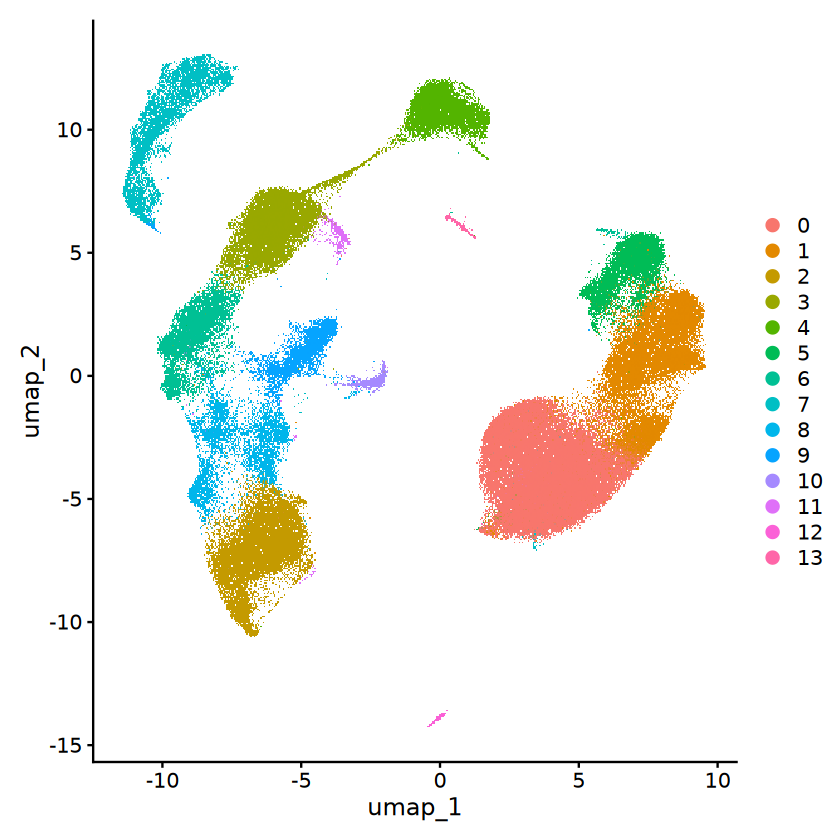

In [3]:
DimPlot(seurat)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



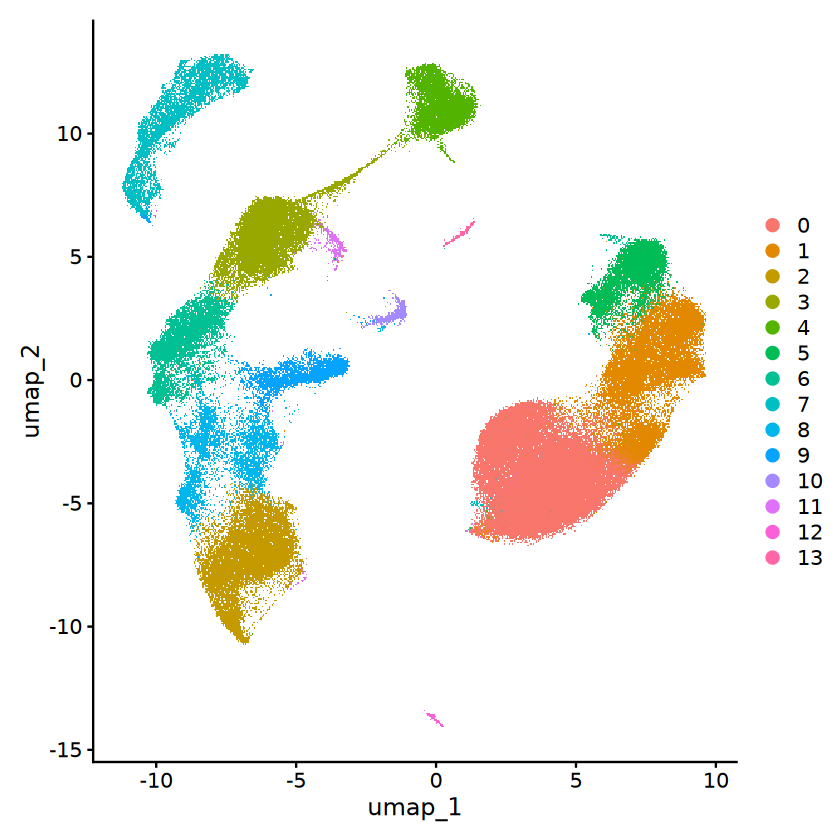

In [4]:
seurat = RunUMAP(seurat, dims = 1:40, reduction = 'harmony', min.dist = .3, verbose = FALSE)
DimPlot(seurat)

In [5]:
library(stringr)
seurat@meta.data$diag = sapply(seurat@meta.data$diag, function(x) str_split(x, fixed('.'))[[1]][1])

In [6]:
table(seurat@meta.data$diag)


     CD45 DIAGNOSIS   RELAPSE REMISSION 
    21124     40906     38354     30970 

In [7]:
library(dplyr)
a = seurat@meta.data %>% filter(diag == "CD45")
table(a$loc)


LONZA    SC   WC4 
 4671 12170  4283 

In [8]:
seurat@meta.data$diag[seurat@meta.data$diag == "CD45"] = 'HEALTHY'

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



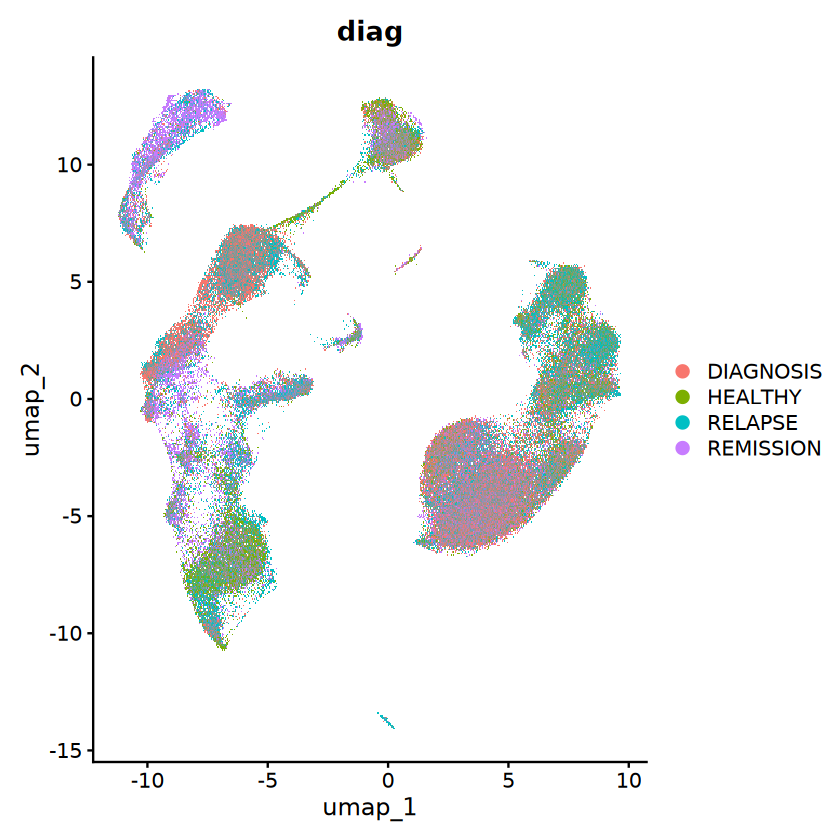

In [9]:
DimPlot(seurat, group = 'diag')

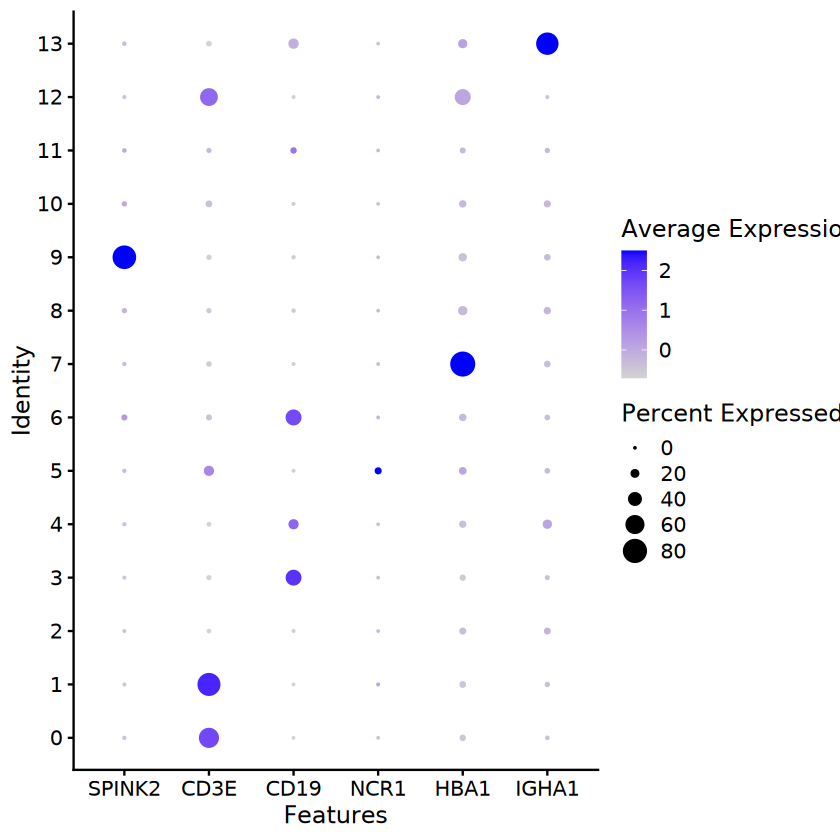

In [10]:
DotPlot(seurat, features = c('SPINK2', 'CD3E','CD19', 'NCR1', 'HBA1', 'IGHA1'))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



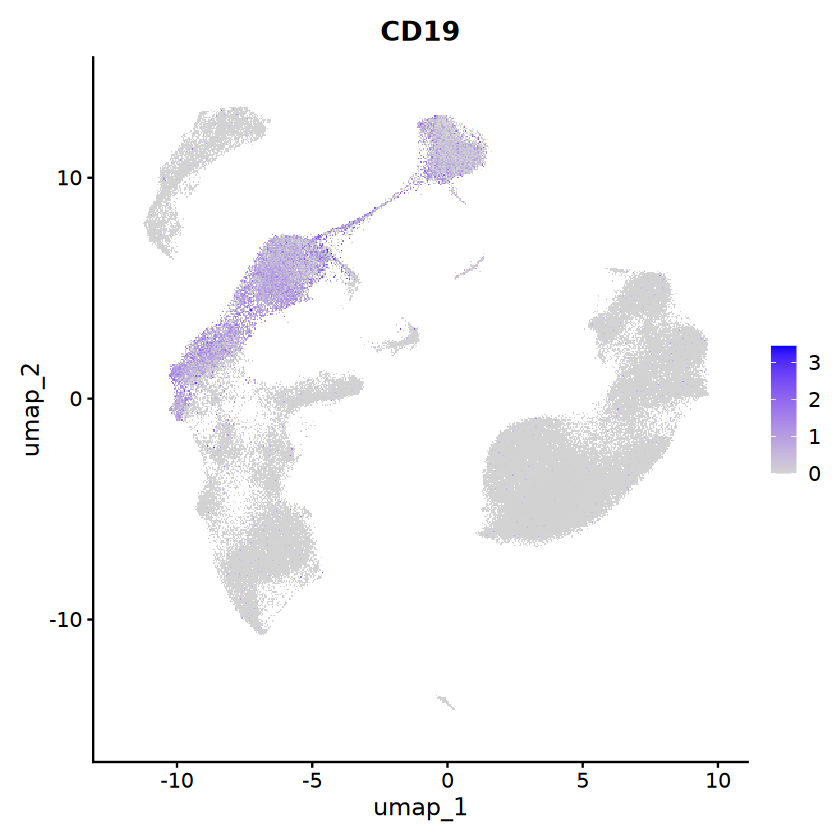

In [11]:
FeaturePlot(seurat, 'CD19')

In [12]:
colnames(seurat@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "patient"        
[5] "loc"             "diag"            "id"              "RNA_snn_res.0.2"
[9] "seurat_clusters"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



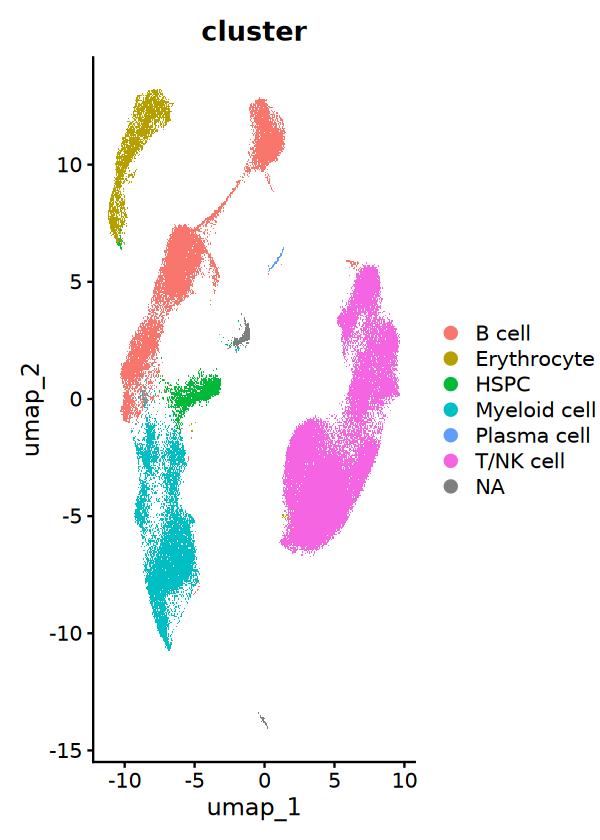

In [13]:
options(repr.plot.width = 5)
Idents(seurat) = 'RNA_snn_res.0.2'
seurat@meta.data$cluster = NA
seurat@meta.data$cluster[Idents(seurat) %in% c(0, 1,5)] = 'T/NK cell'
#seurat@meta.data$cluster[Idents(seurat) %in% c(3,6, 11)] = 'B cell (likely malignant)'
#seurat@meta.data$cluster[Idents(seurat) %in% c(4)] = 'B cell (untransformed)'
seurat@meta.data$cluster[Idents(seurat) %in% c(3,6, 11,4)] = 'B cell'

seurat@meta.data$cluster[Idents(seurat) %in% c(2,8,9)] = 'Myeloid cell'
seurat@meta.data$cluster[Idents(seurat) %in% c(7)] = 'Erythrocyte'
seurat@meta.data$cluster[Idents(seurat) %in% c(9)] = 'HSPC'
seurat@meta.data$cluster[Idents(seurat) %in% c(13)] = 'Plasma cell'

DimPlot(seurat, group = 'cluster')

Loading required package: Rcpp

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  MS4A1, LINC00926, IGHD, IGKC, BIRC3, RPL12, ADAM28, CD83, FCER2, MARCH1 
	   RPS18, IL4R, STK17A, P2RX5, IGLC2, IGLC3, JUNB, RPS17, RPL10, RPL31 
	   NFKBIA, CD69, KLF2, SNX9, IGHM, ARL4A, CD44, LINC02397, RPS14, COBLL1 
Negative:  STMN1, TUBB, TUBA1B, TYMS, HMGB2, UHRF1, PCLAF, PCNA, DUT, NASP 
	   H2AFZ, PRDX1, TK1, MDK, TERF2, HIST1H4C, HMGB1, H2AFY, CKS1B, MCM7 
	   LMNB1, MKI67, DNMT1, CDCA7, CCND3, GAPDH, NUSAP1, JPT1, CDT1, BRCA1 
PC_ 2 
Positive:  RPLP1, RPS18, UBE2C, RPL12, RPS4X, PTTG1, RPS2, RPL3, MKI67, EEF1B2 
	   RPS12, NUSAP1, AURKB, CDKN3, RPS17, BIRC5, PCLAF, RPLP0, RPS14, LSP1 
	   TOP2A, LGALS1, RPS23, CDK1, RRM2, C12orf75, RPL37A, CENPF, GTSE1, RPL31 
Negative:  MME, TERF2, ERG, SLC35E3, ARPP21, TCL1B, AL713998.1, H1F0, RPS4Y2, HPS4 
	   RAG1, H3F3B,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29289
Number of edges: 1042800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9512
Number of communities: 9
Elapsed time: 8 seconds


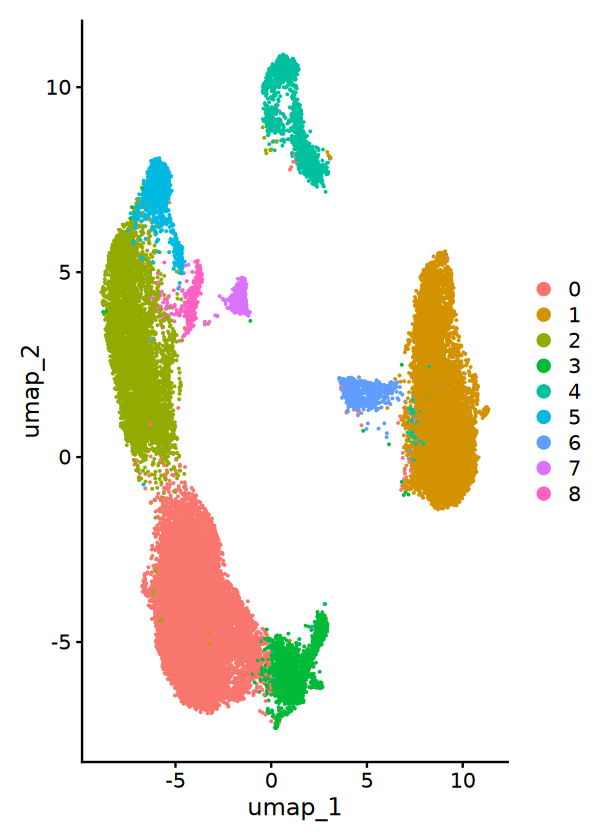

In [14]:
b = subset(seurat, cells = colnames(seurat)[seurat@meta.data$cluster %in% c('B cell')])
library(harmony)
b = FindVariableFeatures(b)
b = ScaleData(b)
b = RunPCA(b)
harmonized_seurat = RunHarmony(b, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')
b = RunUMAP(harmonized_seurat, dims = 1:30, reduction = 'harmony')
b = FindNeighbors(b, reduction = 'harmony', dims = 1:30)
b = FindClusters(b, resolution = .2)
DimPlot(b)

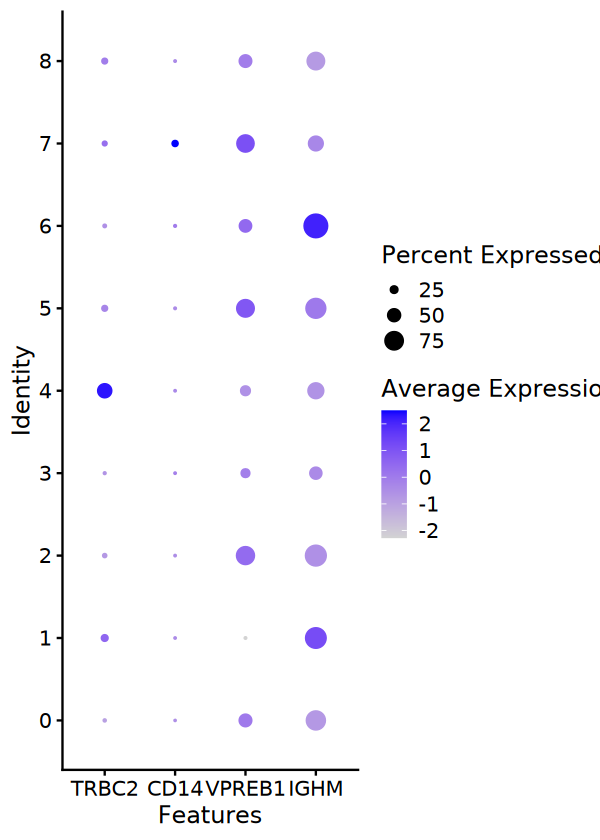

In [15]:
DotPlot(b, features = c('TRBC2', 'CD14', 'VPREB1', 'IGHM'))

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  MS4A1, LINC00926, IGHD, IGKC, BIRC3, RPL12, ADAM28, CD83, MARCH1, RPS18 
	   FCER2, STK17A, IL4R, IGLC2, P2RX5, JUNB, RPS17, IGLC3, CD44, RPL10 
	   RPL31, NFKBIA, ARL4A, SNX9, CD69, COTL1, KLF2, IGHM, LINC02397, HERPUD1 
Negative:  STMN1, TUBB, TUBA1B, TYMS, UHRF1, HMGB2, PCLAF, PCNA, TERF2, PRDX1 
	   DUT, NASP, MDK, TK1, H2AFZ, HIST1H4C, MCM7, H2AFY, LMNB1, CKS1B 
	   HMGB1, TCL1B, CDCA7, MME, CD24, DNMT1, CCND3, ERG, MKI67, CDT1 
PC_ 2 
Positive:  MME, TERF2, ERG, SLC35E3, ARPP21, TCL1B, H1F0, AL713998.1, RPS4Y2, H3F3B 
	   HPS4, RAG1, HIST1H1C, HIST2H2BE, NRIP1, POU4F1, SOX4, FYB1, TMED6, GRK2 
	   CDK6, STAG3, TOP2B, LINC01436, CBFA2T3, SOCS2, LINC00426, ZNF608, CD24, MDK 
Negative:  RPLP1, RPS18, RPL12, RPS4X, UBE2C, RPS2, RPL3, PTTG1, EEF1B2, RPS12 
	   RPS17, MKI67, RPS23, AURKB, RPL10A, NUSA

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26825
Number of edges: 916111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9419
Number of communities: 7
Elapsed time: 18 seconds


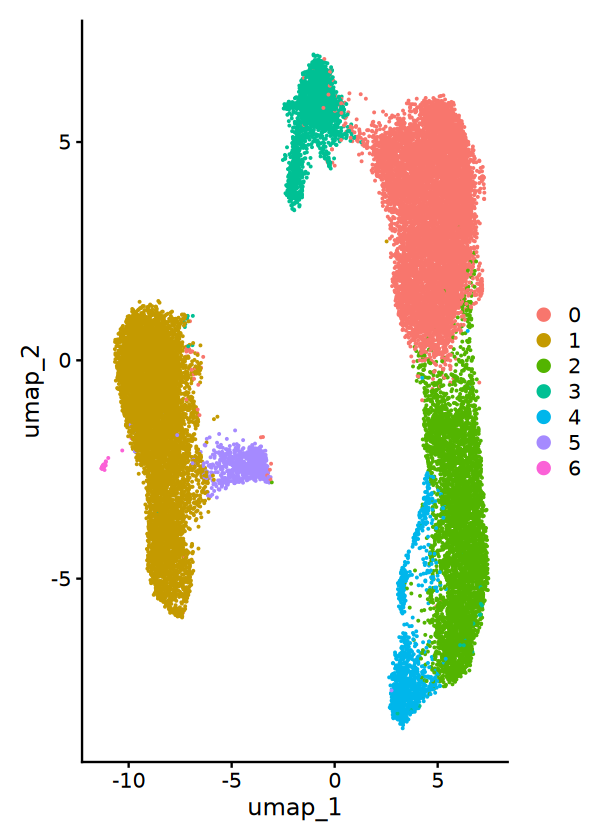

In [16]:
b2 = subset(b, cells = colnames(b)[!b@meta.data$RNA_snn_res.0.2 %in% c(4,7,8)])
b2 = FindVariableFeatures(b2)
b2 = ScaleData(b2)
b2 = RunPCA(b2)
harmonized_seurat = RunHarmony(b2, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')
b2 = RunUMAP(harmonized_seurat, dims = 1:30, reduction = 'harmony')
b2 = FindNeighbors(b2, reduction = 'harmony', dims = 1:30)
b2 = FindClusters(b2, resolution = .2)
DimPlot(b2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 26825
Number of edges: 916111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9648
Number of communities: 6
Elapsed time: 6 seconds


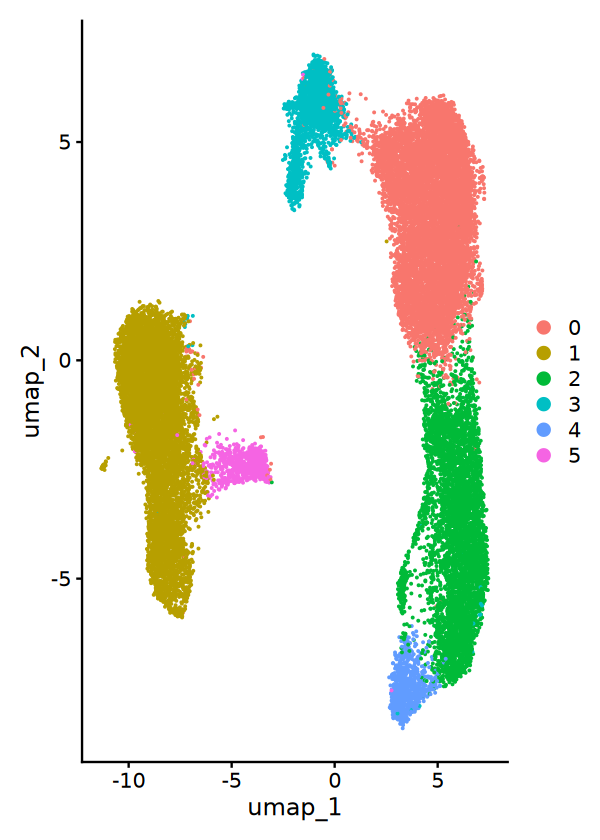

In [17]:
b2 = FindNeighbors(b2, reduction = 'harmony', dims = 1:30)
b2 = FindClusters(b2, resolution = .1)
DimPlot(b2)

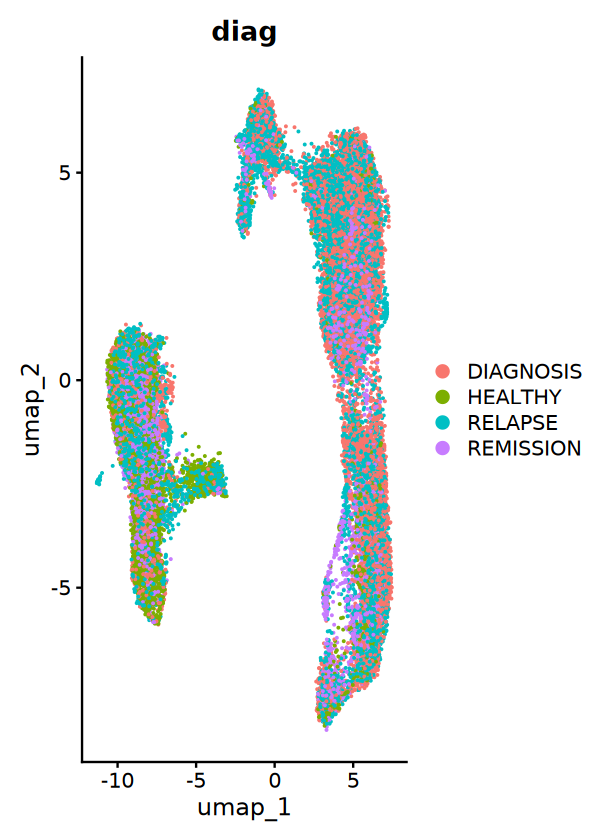

In [18]:
DimPlot(b2, group = 'diag')

`summarise()` has grouped output by 'diag', 'patient'. You can override using
the `.groups` argument.


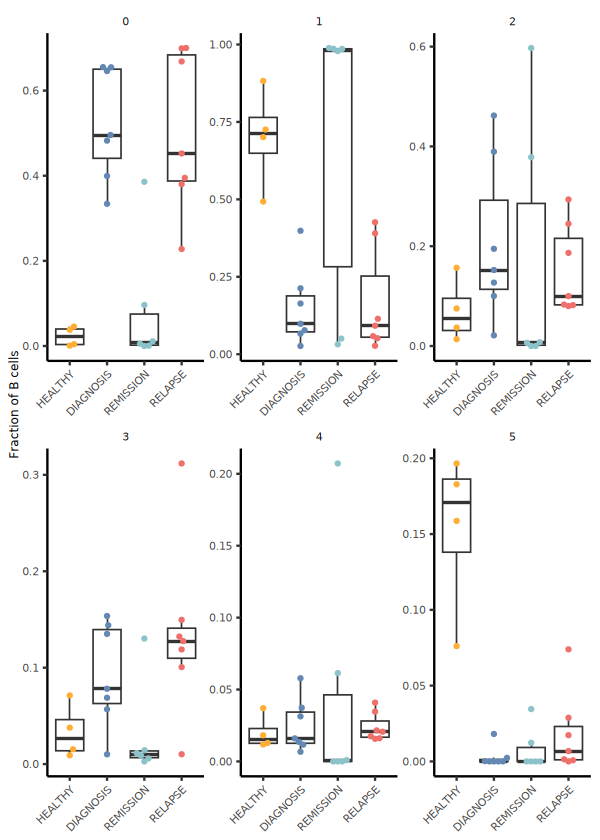

In [22]:
library(ggbeeswarm)
library(ggthemes)
df = b2@meta.data %>% group_by(diag, patient, RNA_snn_res.0.1) %>% 
summarise(n = n()) %>% mutate(p = n/sum(n)) %>% tidyr::complete(RNA_snn_res.0.1, fill = list(p = 0))

ggplot(df, aes(x = diag, y = p)) + geom_boxplot(outlier.shape = NA,size = .355) + facet_wrap('RNA_snn_res.0.1', scales = 'free') + theme_classic() + Axis_themes + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(x = c(), y = 'Fraction of B cells') + 
geom_beeswarm(cex = 3, size = 1.5, stroke = 0, aes(color = diag)) + guides(color = FALSE) + 
scale_color_manual(values = tableau_color_pal('Superfishel Stone')(10)) + 
scale_x_discrete(limits = c('HEALTHY', 'DIAGNOSIS', 'REMISSION', 'RELAPSE'))

In [23]:
b2@meta.data$bclust = 'B cell (likely healthy)'
b2@meta.data$bclust[b2@meta.data$RNA_snn_res.0.1 %in% c(0, 3)] = 'B cell (likely malignant)'

`summarise()` has grouped output by 'diag', 'patient'. You can override using
the `.groups` argument.


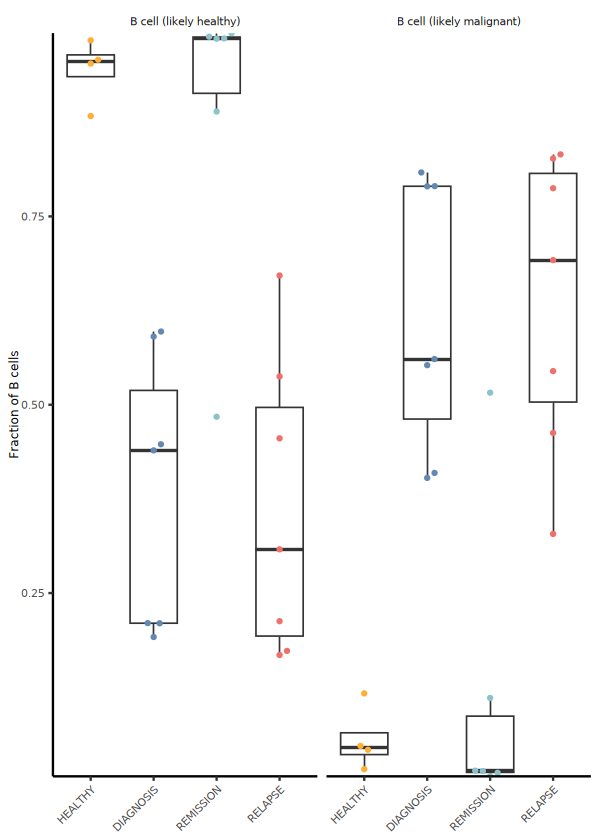

In [24]:
df = b2@meta.data %>% group_by(diag, patient, bclust) %>% 
summarise(n = n()) %>% mutate(p = n/sum(n)) %>% tidyr::complete(bclust, fill = list(p = 0))

g5 = ggplot(df, aes(x = diag, y = p)) + geom_boxplot(outlier.shape = NA,size = .355) + facet_wrap('bclust') + theme_classic() + Axis_themes + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + labs(x = c(), y = 'Fraction of B cells') + 
geom_beeswarm(cex = 3, size = 1.5, stroke = 0, aes(color = diag)) + guides(color = FALSE) + 
scale_color_manual(values = tableau_color_pal('Superfishel Stone')(10)) + 
scale_x_discrete(limits = c('HEALTHY', 'DIAGNOSIS', 'REMISSION', 'RELAPSE')) + 
scale_y_continuous(expand = c(0,0))

g5

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  STMN1, PCLAF, TUBA1B, HIST1H4C, H2AFZ, TYMS, TUBB, RPLP0, MKI67, NUCKS1 
	   LDHB, HMGN1, RPS18, CKS1B, RPSA, RPS4X, DUT, RANBP1, HMGN2, RPS3 
	   RPS23, RAN, PTTG1, TK1, C12orf75, HMGB1, PCNA, PEBP1, HMGB2, MPO 
Negative:  SAT1, FTH1, S100A9, SERPINA1, NAMPT, S100A12, S100A8, LST1, DUSP1, CD14 
	   MAFB, IFI30, G0S2, RGS2, HIF1A, C5AR1, PLAUR, CD52, NINJ1, TXNIP 
	   ZFP36L1, BCL2A1, NCF1, TIMP1, SLC2A3, UPP1, RBP7, JUNB, COTL1, FCER1G 
PC_ 2 
Positive:  FCGR3A, IFITM3, MS4A7, RHOC, ABI3, LY6E, CDKN1C, OAS1, TNFSF10, SIGLEC10 
	   IFITM1, HES4, IFITM2, HLA-DPA1, TCF7L2, PPM1N, CSF1R, PSMB9, IFIT3, MTSS1 
	   VMO1, FCER1G, LILRB1, HCK, POU2F2, HLA-C, GBP2, CKB, ISG15, CX3CR1 
Negative:  LYZ, S100A8, AC020656.1, S100A9, S100A12, RPL37A, RETN, SLC2A3, HIF1A, AC007952.4 
	   RNASE2, AZU1, RPS12, AC245014

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18982
Number of edges: 739920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9306
Number of communities: 10
Elapsed time: 5 seconds


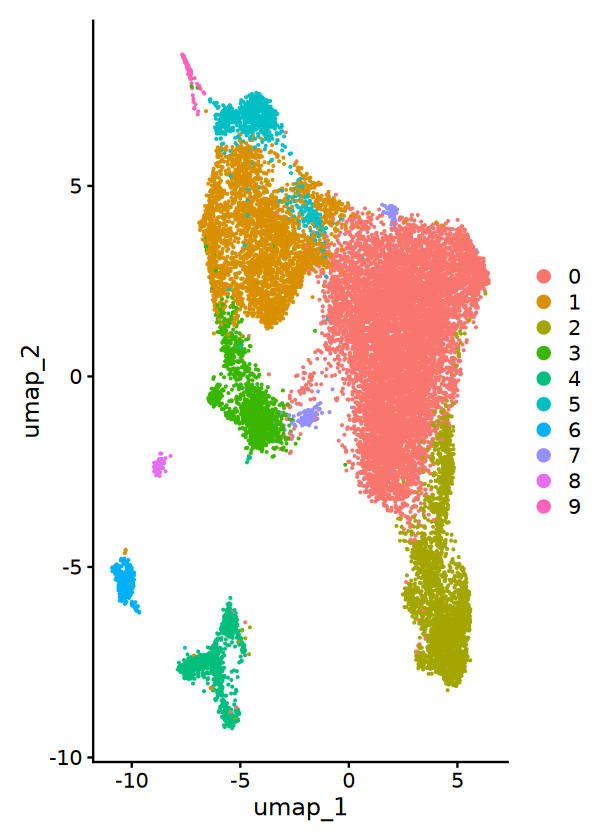

In [25]:
mye = subset(seurat, cells = colnames(seurat)[seurat@meta.data$cluster == 'Myeloid cell'])
library(harmony)
mye = FindVariableFeatures(mye)
mye = ScaleData(mye)
mye = RunPCA(mye)
harmonized_seurat = RunHarmony(mye, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')
mye = RunUMAP(harmonized_seurat, dims = 1:30, reduction = 'harmony')
mye = FindNeighbors(mye, reduction = 'harmony', dims = 1:30)
mye = FindClusters(mye, resolution = .2)
DimPlot(mye)

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  STMN1, PCLAF, TUBA1B, HIST1H4C, H2AFZ, TYMS, RPLP0, RPS18, NUCKS1, TUBB 
	   MKI67, LDHB, MPO, HMGN1, RPS23, RPS4X, RPSA, CKS1B, RPS3, PTTG1 
	   RANBP1, HMGN2, C12orf75, DUT, RPS6, IGFBP7, RAN, UBE2C, TK1, PEBP1 
Negative:  SAT1, FTH1, SERPINA1, NAMPT, S100A9, S100A12, CD52, LST1, DUSP1, S100A8 
	   MAFB, CD14, RGS2, IFI30, C5AR1, G0S2, HIF1A, ZFP36L1, TXNIP, PLAUR 
	   BCL2A1, NINJ1, LGALS3, TNFRSF1B, NCF1, JUNB, CD300E, COTL1, S100A11, LILRA5 
PC_ 2 
Positive:  LYZ, S100A8, S100A12, AC020656.1, S100A9, RPL37A, RETN, HIF1A, RPS21, SLC2A3 
	   AC007952.4, CXCL8, AC245014.3, KLF10, COG3, JUN, ALOX5AP, RPS12, RPS4Y1, MIR22HG 
	   SLC38A2, JARID2, AZU1, RNASE2, IER3, MGST1, AC103591.3, SERPINB2, CES1, G0S2 
Negative:  FCGR3A, IFITM3, MS4A7, RHOC, ABI3, LY6E, IFITM1, TNFSF10, OAS1, CDKN1C 
	   SIGLEC10, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17521
Number of edges: 672652

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9158
Number of communities: 8
Elapsed time: 3 seconds


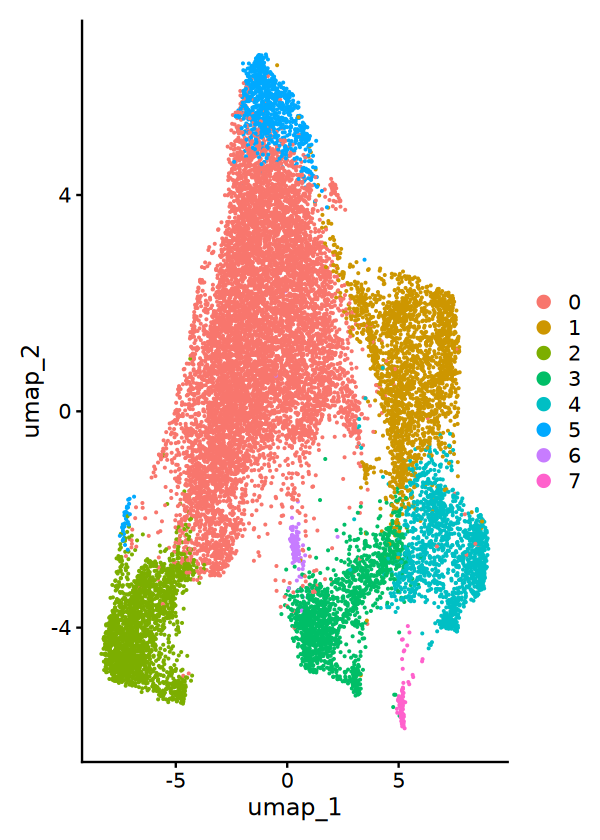

In [26]:
mye = subset(mye, cells = colnames(mye)[!Idents(mye) %in% c(4,6,8)])
library(harmony)
mye = FindVariableFeatures(mye)
mye = ScaleData(mye)
mye = RunPCA(mye)
harmonized_seurat = RunHarmony(mye, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')
mye = RunUMAP(harmonized_seurat, dims = 1:30, reduction = 'harmony')
mye = FindNeighbors(mye, reduction = 'harmony', dims = 1:30)
mye = FindClusters(mye, resolution = .2)
DimPlot(mye)

Finding variable features for layer counts

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  FTH1, SAT1, SERPINA1, NAMPT, LST1, S100A9, CEBPB, S100A12, CD52, TYMP 
	   MAFB, VCAN, DUSP1, IFI30, RGS2, C5AR1, FCER1G, CD14, TXNIP, AIF1 
	   LGALS3, S100A11, BCL2A1, COTL1, NINJ1, ZFP36L1, TNFRSF1B, G0S2, JUNB, S100A8 
Negative:  STMN1, PCLAF, HIST1H4C, TUBA1B, RPS18, RPLP0, TYMS, H2AFZ, MPO, RPS23 
	   NUCKS1, MKI67, LDHB, HMGN1, TUBB, RPS3, RPS6, RPS4X, RPSA, PTTG1 
	   HMGB2, C12orf75, CKS1B, RANBP1, AZU1, HMGN2, ITM2C, UBE2C, TK1, HMGB1 
PC_ 2 
Positive:  LYZ, S100A8, S100A12, S100A9, AC020656.1, RPL37A, VCAN, HIF1A, RPS21, RETN 
	   SLC2A3, RPS12, AC007952.4, CXCL8, RPS4Y1, KLF10, MIR22HG, COG3, IER3, G0S2 
	   AC245014.3, JUN, JARID2, SLC38A2, SNHG25, PLBD1, ALOX5AP, ZBTB43, VEGFA, SERPINB2 
Negative:  FCGR3A, IFITM3, MS4A7, ABI3, RHOC, LY6E, IFITM1, TNFSF10, OAS1, HLA-DPA1 
	   PSMB9, CDKN1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16482
Number of edges: 631166

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9185
Number of communities: 7
Elapsed time: 3 seconds


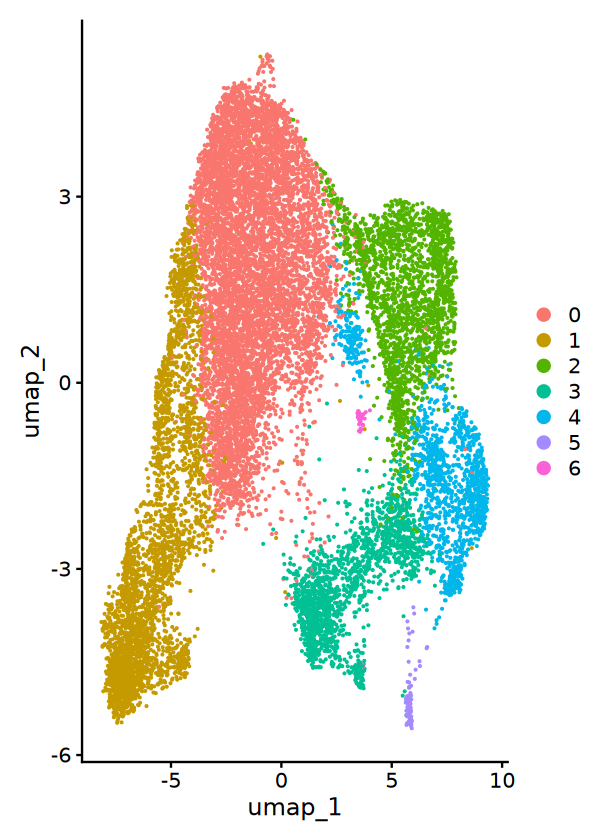

In [27]:
mye = subset(mye, cells = colnames(mye)[!Idents(mye) %in% c(5,6,8)])
library(harmony)
mye = FindVariableFeatures(mye)
mye = ScaleData(mye)
mye = RunPCA(mye)
harmonized_seurat = RunHarmony(mye, group.by.vars = 'id', reduction = 'pca',
                              reduction.save = 'harmony')
mye = RunUMAP(harmonized_seurat, dims = 1:30, reduction = 'harmony')
mye = FindNeighbors(mye, reduction = 'harmony', dims = 1:30)
mye = FindClusters(mye, resolution = .2)
DimPlot(mye)

In [28]:
mye = FindNeighbors(mye, reduction = 'harmony', dims = 1:30)
mye = FindClusters(mye, resolution = .15)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16482
Number of edges: 631166

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9318
Number of communities: 6
Elapsed time: 3 seconds


In [29]:
mye@meta.data$myeclust = NA
mye@meta.data$myeclust[Idents(mye) == 0] = 'CD14+ monocyte'
mye@meta.data$myeclust[Idents(mye) == 2] = 'CD16+ monocyte'
mye@meta.data$myeclust[Idents(mye) == 1] = 'Gran/Mono progenitor'
#mye@meta.data$myeclust[Idents(mye) == 3] = 'CD1C+ DC'
#mye@meta.data$myeclust[Idents(mye) == 4] = 'XCR1+ DC'
mye@meta.data$myeclust[Idents(mye) %in% c(3,4)] = 'DC'

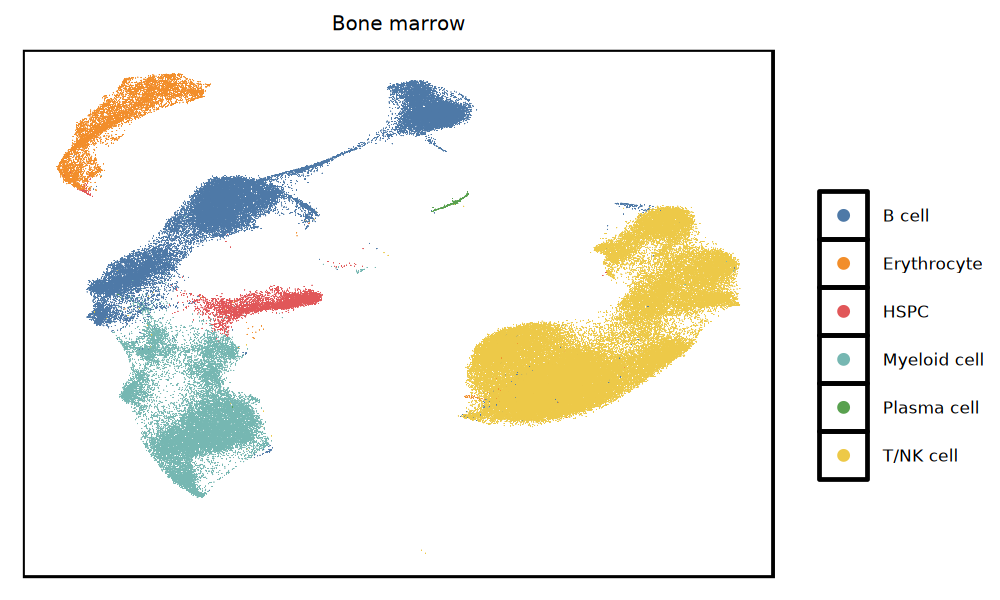

In [30]:
library(ggplot2)
library(ggthemes)
library(ggrastr)
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
pal = tableau_color_pal('Tableau 10')(10)
seurat@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(seurat, 'umap')
g1 = ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% filter(!is.na(cluster)), aes(x = UMAP1, y = UMAP2, color =cluster)) + 
geom_point_rast(size = .2, stroke =0, raster.dpi = 1000 ) + scale_color_manual(values =pal) + theme_classic() + Axis_themes + 
 UMAP_theme + ggtitle('Bone marrow') + theme(legend.position = 'right', legend.text = element_text(size = 6)) + labs(color = c('')) + 
guides(color = guide_legend(override.aes = list(size = 2)))
g1

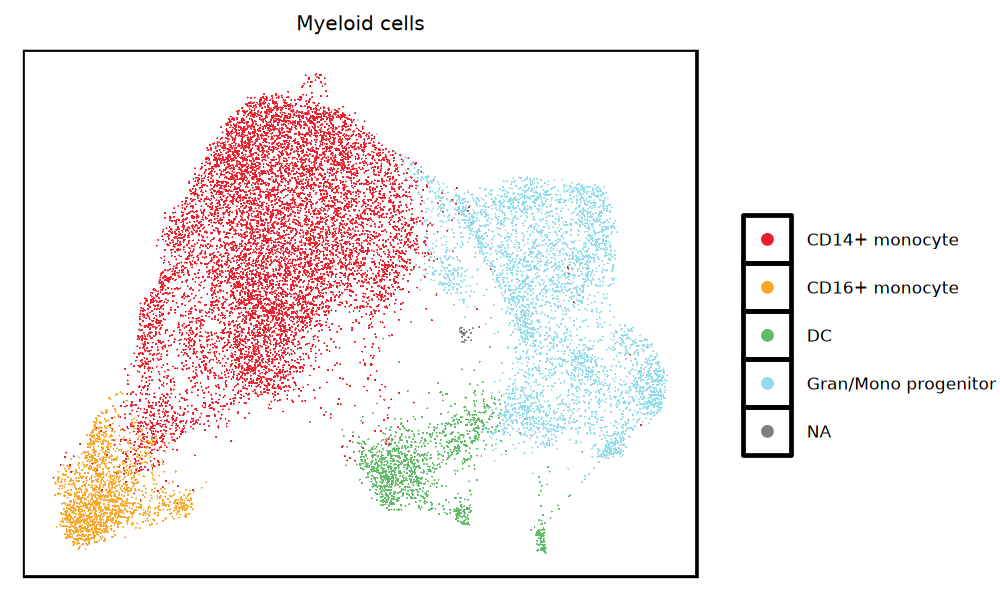

In [31]:
library(ggplot2)
library(ggthemes)
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)
pal = tableau_color_pal('Jewel Bright')(9)[c(1,3,5,7,9)]
mye@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(mye, 'umap')
g4 = ggplot(mye@meta.data[sample(rownames(mye@meta.data)),] %>% filter(!is.na(cluster)), aes(x = UMAP1, y = UMAP2, color =myeclust)) + 
geom_point_rast(size = .3, stroke =0, raster.dpi = 1000 ) + scale_color_manual(values =pal) + theme_classic() + Axis_themes + 
 UMAP_theme + ggtitle('Myeloid cells') + theme(legend.position = 'right') + labs(color = c('')) +
guides(color = guide_legend(override.aes = list(size = 2))) + theme(legend.text = element_text(size = 6))
g4

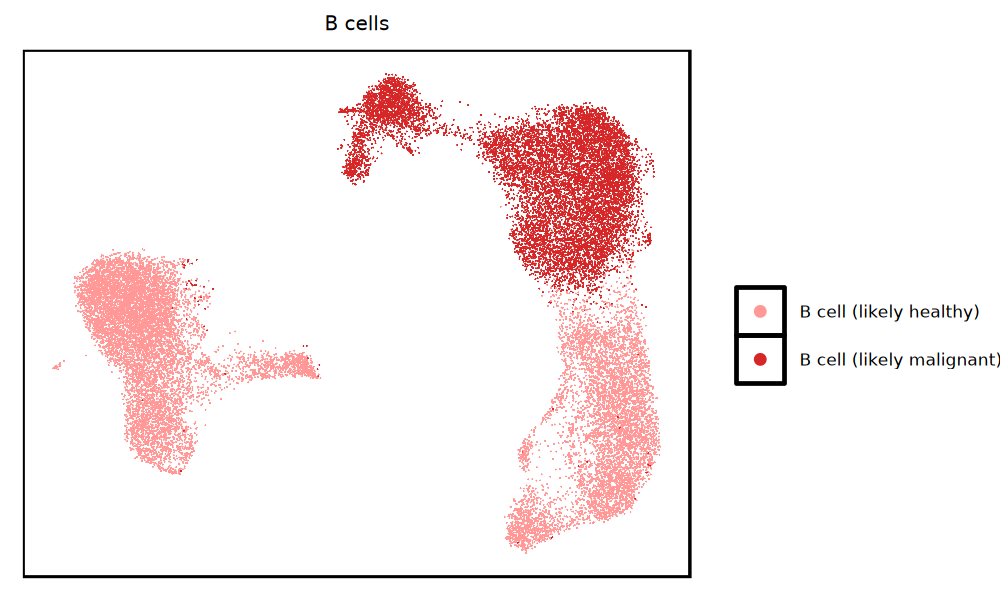

In [32]:
pal = rev(c('#d62728', '#ff9896'))
b2@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(b2, 'umap')
bumap = ggplot(b2@meta.data[sample(rownames(b2@meta.data)),] %>% filter(!is.na(cluster)), aes(x = UMAP1, y = UMAP2, color =bclust)) + 
geom_point_rast(size = .3, stroke =0, raster.dpi = 1000 ) + scale_color_manual(values =pal) + theme_classic() + Axis_themes + 
 UMAP_theme + ggtitle('B cells') + theme(legend.position = 'right') + labs(color = c('')) +
guides(color = guide_legend(override.aes = list(size = 2))) + theme(legend.text = element_text(size = 6))
bumap

Loading required package: viridisLite

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


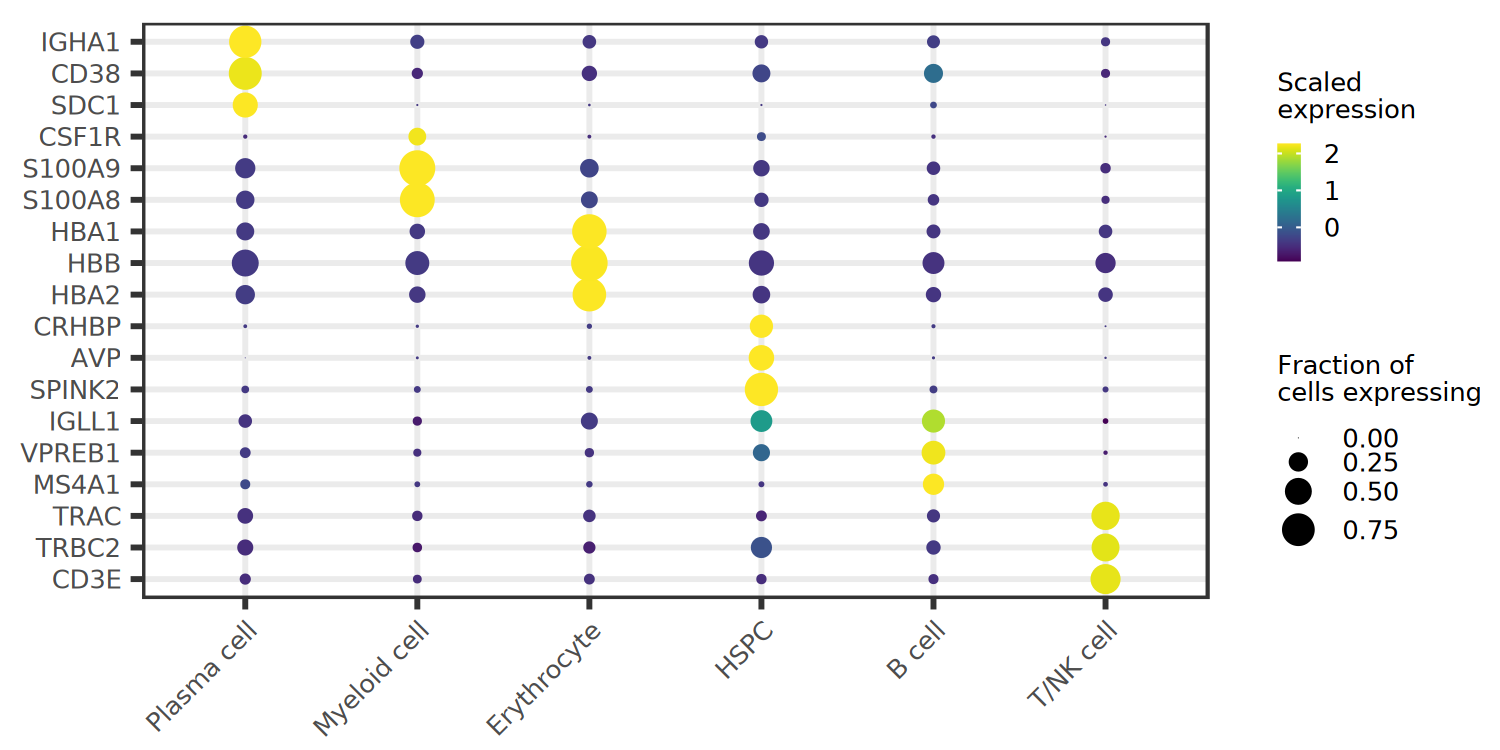

In [33]:
# Figure 1C: bexpression of marker genes intissue-resident cell populations
options(repr.plot.width = 5, repr.plot.height  =2.5, repr.plot.res = 300)
library(reshape2)
library(viridis)
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
genes =( c("CD3E", 'TRBC2', 'TRAC', 
            #'IGLL1', 'VPREB1', 'IDH2','MS4A1', 'FCER2', 'IGKC',
           'MS4A1', 'VPREB1', 'IGLL1',
             'SPINK2', 'AVP', 'CRHBP', 
                            'HBA2', 'HBB', 'HBA1',

             'S100A8', 'S100A9', 'CSF1R' , 
              'SDC1', 'CD38', 'IGHA1'
             ))
data = as.data.frame(t(as.matrix(GetAssayData(seurat)[genes,])))
data$phenotype = seurat@meta.data$cluster
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value >2.5] = 2.5
df_exp$value[df_exp$value < -1] = -1
df_exp$pct = df_pct$value
#lvs = rev(c('T/NK cell', 'B cell (likely malignant)', 'B cell (untransformed)', 'HSPC', 'Erythrocyte', 'Myeloid cell', 'Plasma cell'))
lvs = rev(c('T/NK cell', 'B cell', 'HSPC', 'Erythrocyte', 'Myeloid cell', 'Plasma cell'))

g2 = ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point(stroke = 0) + scale_color_viridis()  + 
 theme_bw() + Axis_themes + theme(axis.title = element_blank(), axis.text.x = element_text(size = 6,angle = 45, hjust = 1)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of\ncells expressing') + scale_x_discrete(limits = genes)  + 
theme(axis.title = element_blank()) + scale_y_discrete(limits = (lvs)) + coord_flip() + 
#guides(size = FALSE, color = FALSE)+
scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75)) + 
 theme(axis.text.x = element_text(size = 6)) + 
theme(legend.key.size = unit(2, 'mm')) 
g2

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


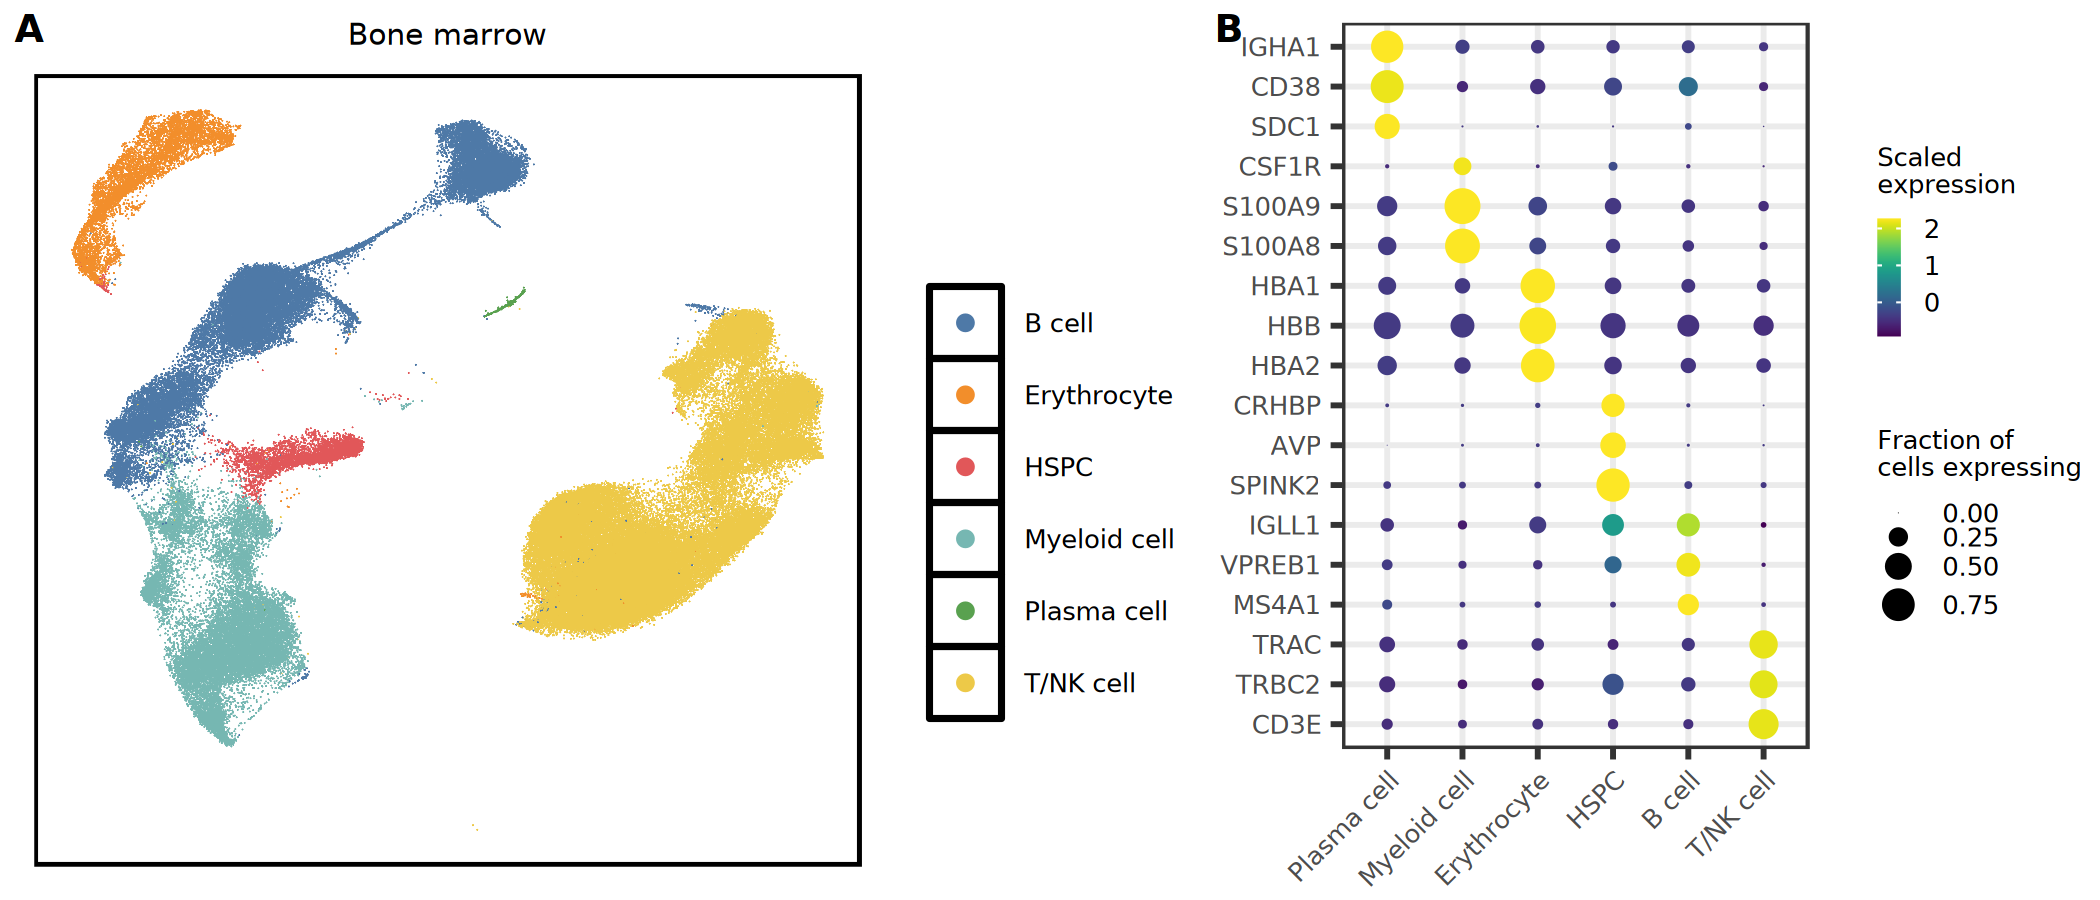

In [34]:
options(repr.plot.width = 7, repr.plot.height = 3)
r1 = cowplot::plot_grid(g1, g2, rel_widths = c(4,3), labels = c('A', 'B'), label_size = 9)
r1

Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


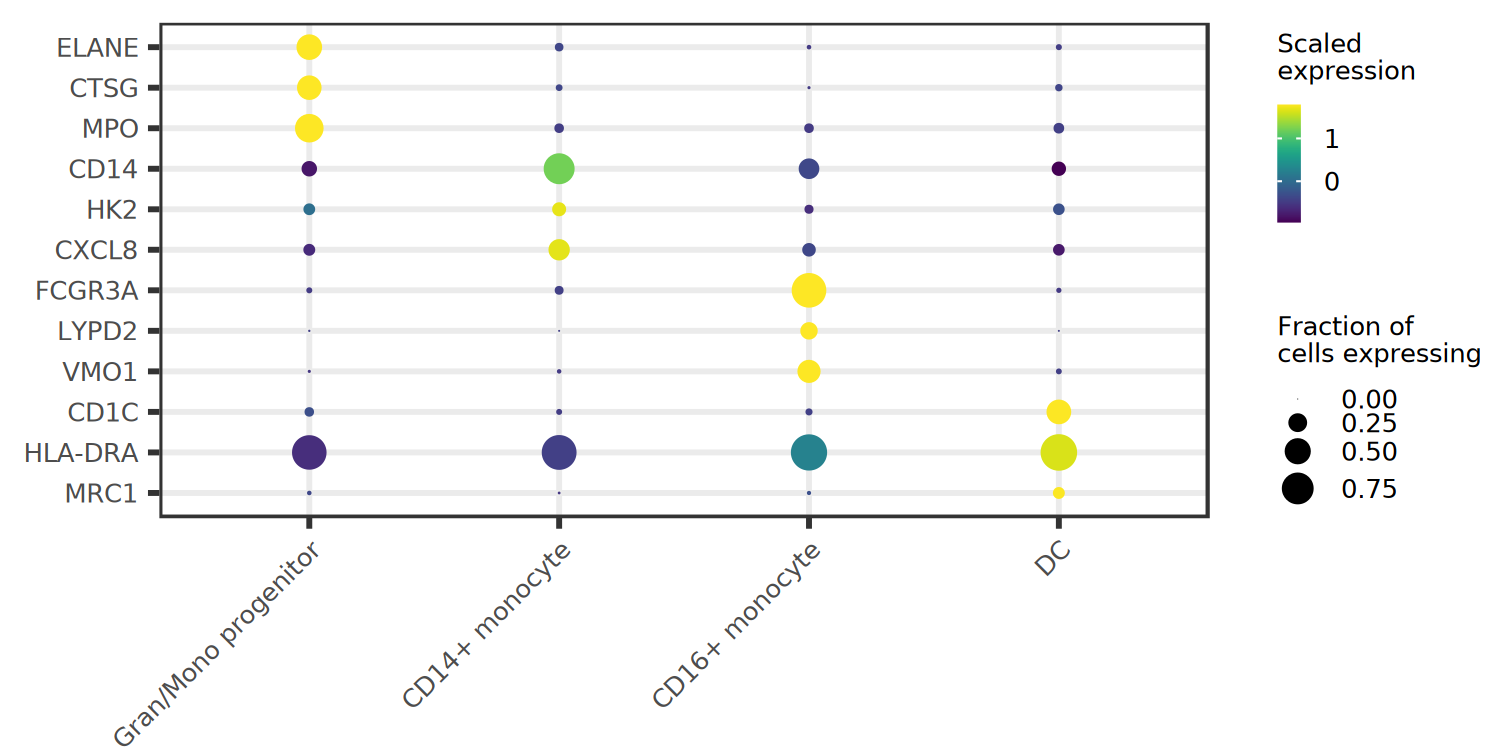

In [35]:
# Figure 1C: bexpression of marker genes intissue-resident cell populations
options(repr.plot.width = 5, repr.plot.height  =2.5, repr.plot.res = 300)
library(reshape2)
library(viridis)
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
genes =rev( c('ELANE', 'CTSG', 'MPO', 'CD14', 'HK2','CXCL8','FCGR3A', 'LYPD2', 'VMO1', 
           'CD1C', 'HLA-DRA', 'MRC1'))#, 'XCR1', 'CLEC9A', 'BATF3))
data = as.data.frame(t(as.matrix(GetAssayData(mye)[genes,])))
data$phenotype = mye@meta.data$myeclust
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value >2.5] = 2.5
df_exp$value[df_exp$value < -1] = -1
df_exp$pct = df_pct$value
lvs = (c('Gran/Mono progenitor', 'CD14+ monocyte', 'CD16+ monocyte', 'DC'))
g3 = ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point(stroke = 0) + scale_color_viridis()  + 
 theme_bw() + Axis_themes + theme(axis.title = element_blank(), axis.text.x = element_text(size = 6,angle = 45, hjust = 1)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of\ncells expressing') + scale_x_discrete(limits = genes)  + 
theme(axis.title = element_blank()) + scale_y_discrete(limits = (lvs)) + coord_flip() + 
#guides(size = FALSE, color = FALSE)+
scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75)) + 
 theme(axis.text.x = element_text(size = 6)) + 
theme(legend.key.size = unit(2, 'mm')) 
g3

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


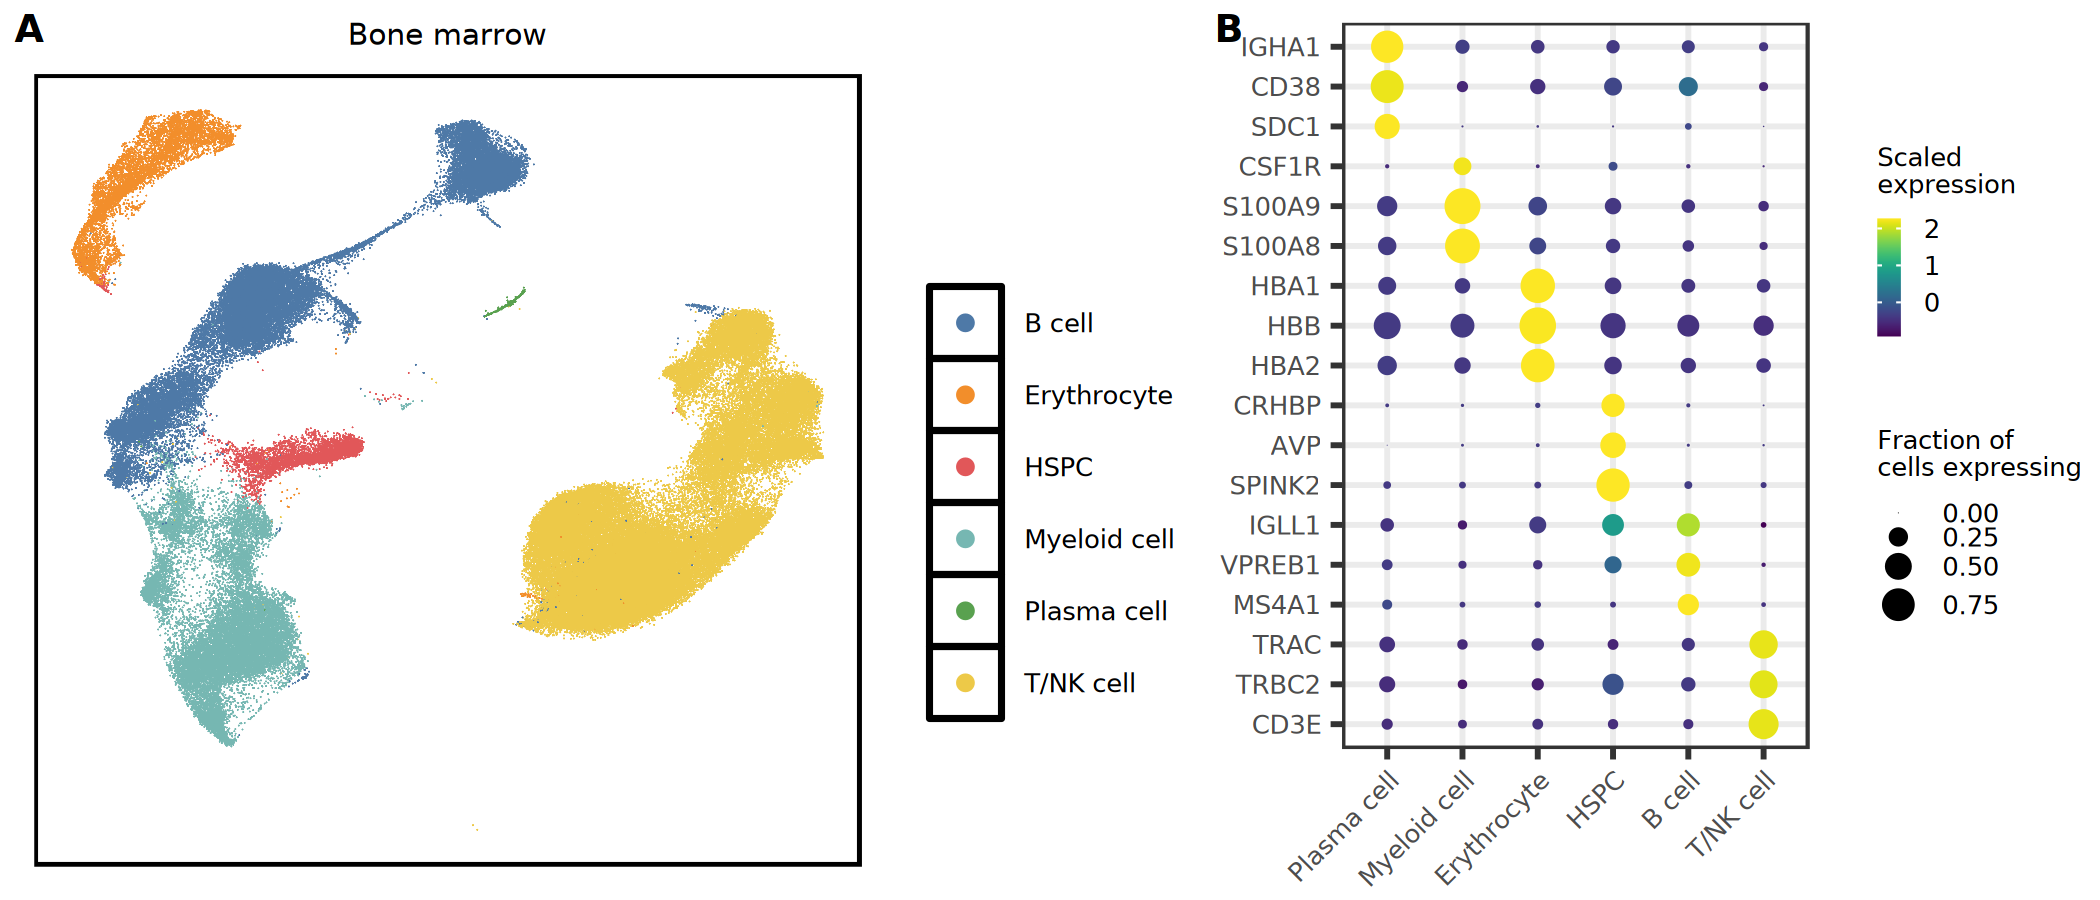

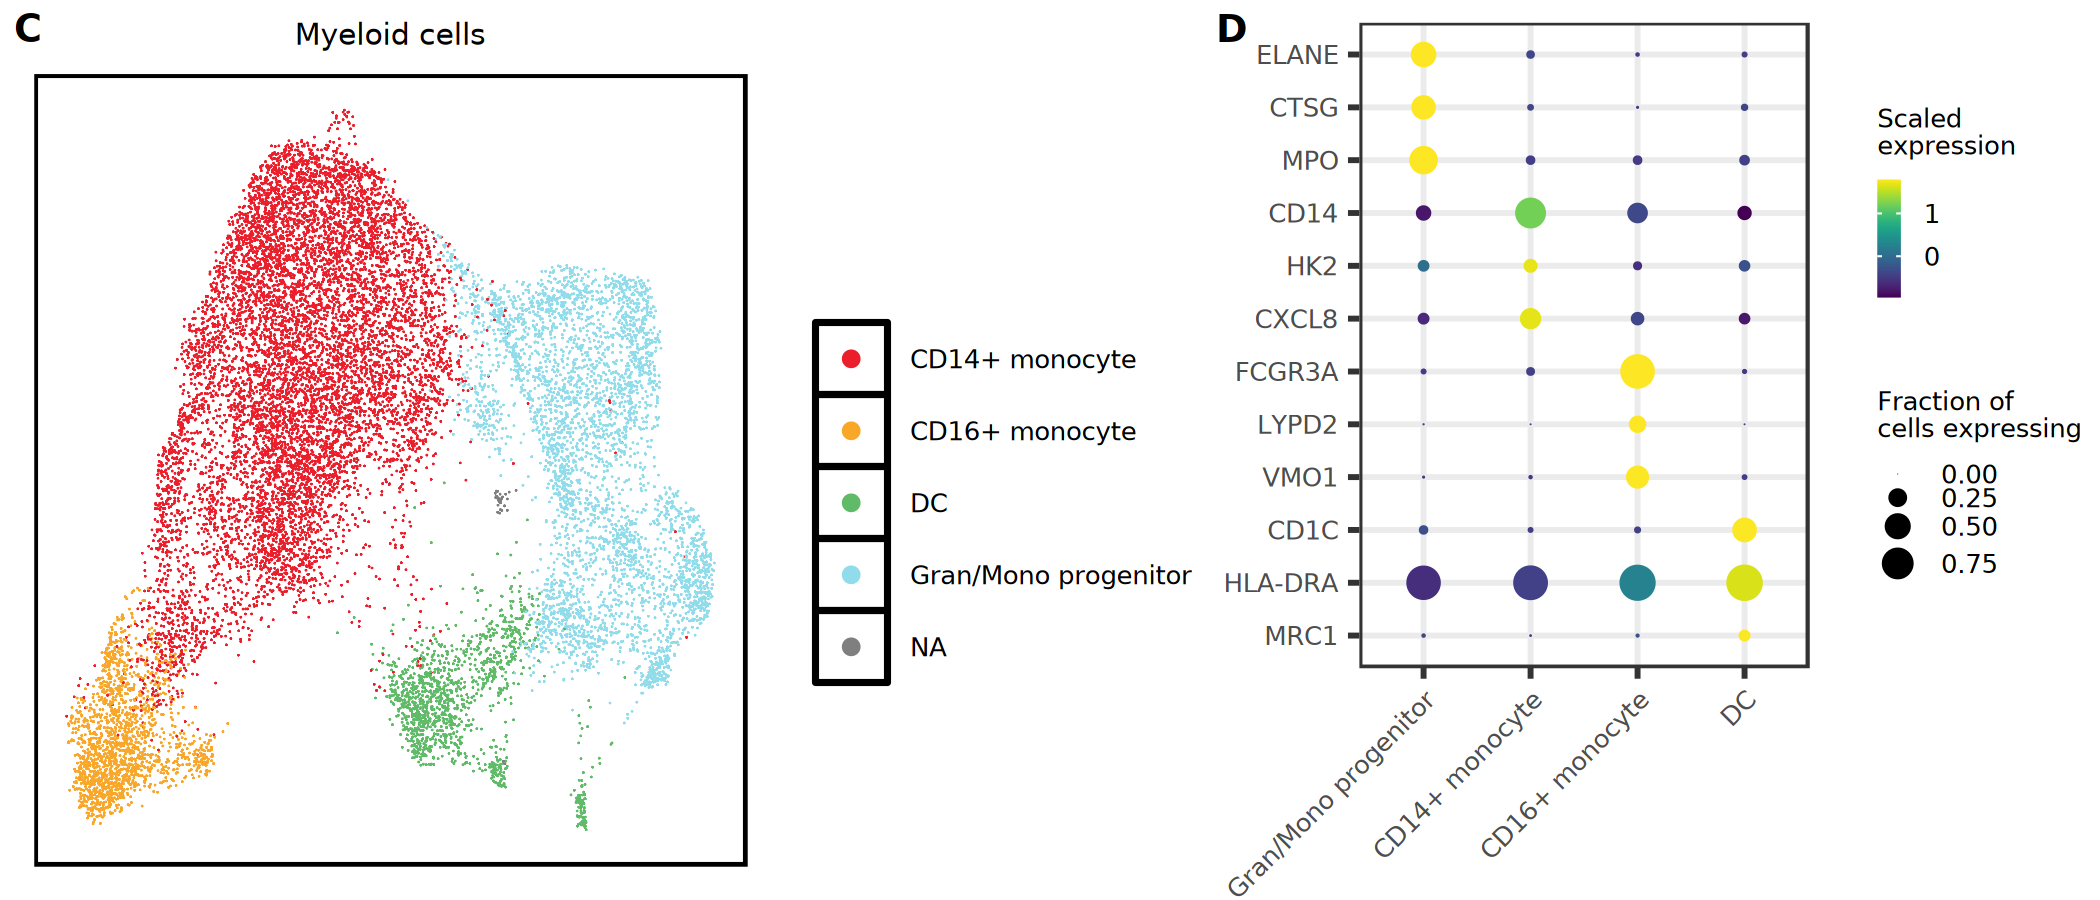

In [36]:
options(repr.plot.width = 7, repr.plot.height = 3)
r1 = cowplot::plot_grid(g1, g2, rel_widths = c(4,3), labels = c('A', 'B'), label_size = 9)
r1

r2 = cowplot::plot_grid(g4, g3, rel_widths = c(4,3), labels = c('C', 'D'), label_size = 9)
r2

In [37]:
seurat@meta.data$allclust = seurat@meta.data$cluster
seurat@meta.data[colnames(mye), 'allclust'] = mye@meta.data$myeclust
seurat@meta.data[colnames(b2), 'allclust'] = b2@meta.data$bclust

In [38]:
costim = c('CD80', 'CD86', 'TNFSF9', 'ICOSLG', 'TNFSF4', 'TNFSF18', 'TNFSF14')
#DotPlot(subset(seurat, cells = colnames(seurat)[!is.na(seurat@meta.data$allclust)]), costim, group.by = 'allclust')

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


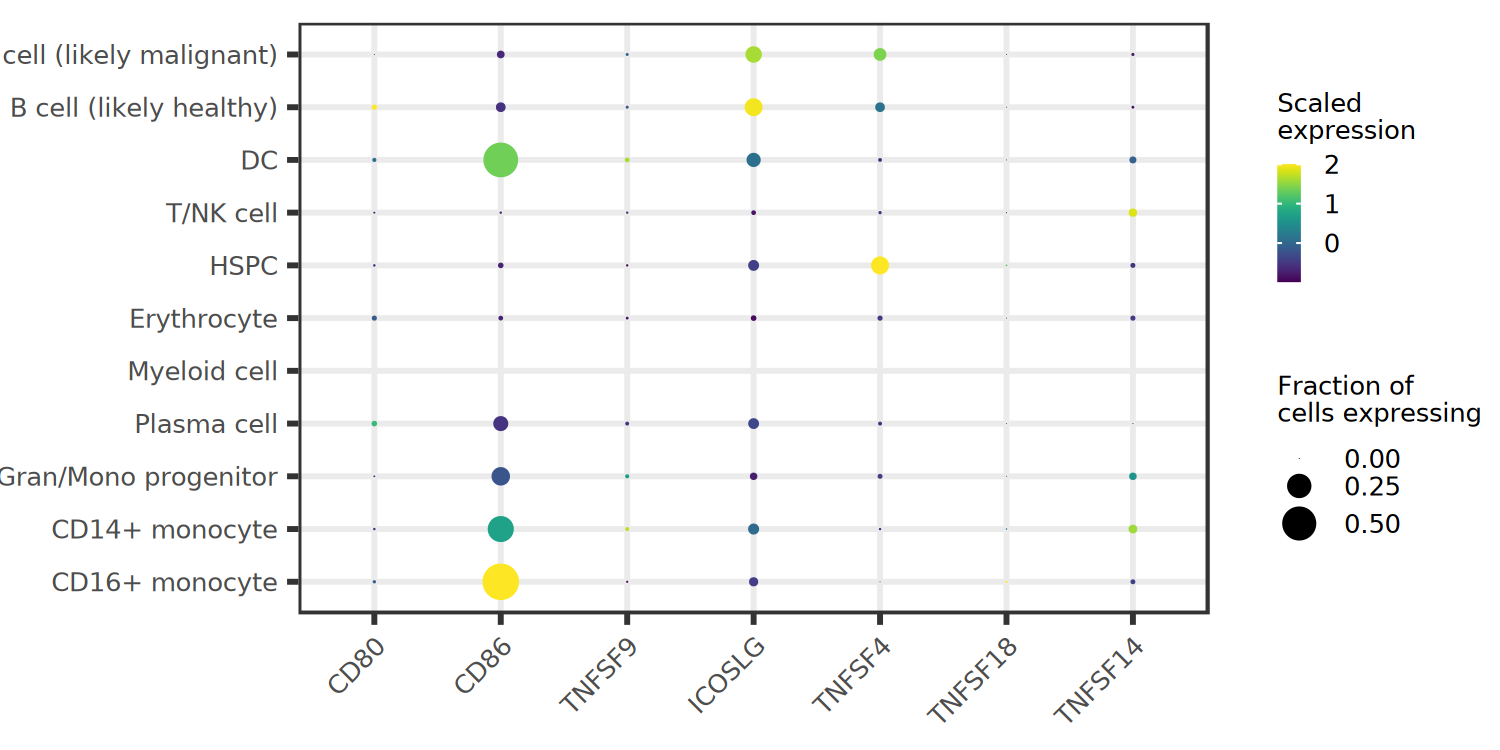

In [39]:
# Figure 1C: bexpression of marker genes intissue-resident cell populations
options(repr.plot.width = 5, repr.plot.height  =2.5, repr.plot.res = 300)
library(reshape2)
library(viridis)
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
genes =(costim)
data = as.data.frame(t(as.matrix(GetAssayData(seurat)[genes,])))
data$phenotype = seurat@meta.data$allclust
data = data[data$phenotype != 'Myeloid cell' ,]
data = data[data$phenotype != 'B cell' ,]

df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value >2] = 2
df_exp$value[df_exp$value < -1] = -1
df_exp$pct = df_pct$value
#lvs = rev(c( 'B cell (likely malignant)', 'B cell (likely healthy)', 'CD1C+ DC', 'XCR1+ DC','T/NK cell', 'HSPC', 'Erythrocyte', 'Myeloid cell', 'Plasma cell','Gran/Mono progenitor', 'CD14+ monocyte', 'CD16+ monocyte'))
#lvs = rev(c( 'B cell', 'DC', 'T/NK cell', 'HSPC', 'Erythrocyte', 'Myeloid cell', 'Plasma cell','Gran/Mono progenitor', 'CD14+ monocyte', 'CD16+ monocyte'))
lvs = rev(c( 'B cell (likely malignant)', 'B cell (likely healthy)', 'DC','T/NK cell', 'HSPC', 'Erythrocyte', 'Myeloid cell', 'Plasma cell','Gran/Mono progenitor', 'CD14+ monocyte', 'CD16+ monocyte'))

g6 = ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point(stroke = 0) + scale_color_viridis()  + 
 theme_bw() + Axis_themes + theme(axis.title = element_blank(), axis.text.x = element_text(size = 6,angle = 45, hjust = 1)) + 
labs(color = "Scaled\nexpression", size = 'Fraction of\ncells expressing') + scale_x_discrete(limits = genes)  + 
theme(axis.title = element_blank()) + scale_y_discrete(limits = (lvs)) + 
#guides(size = FALSE, color = FALSE)+
scale_size_continuous(range = c(.01, 4), breaks = c(0,.25, .5, .75)) + 
 theme(axis.text.x = element_text(size = 6)) + 
theme(legend.key.size = unit(2, 'mm')) 
g6

In [40]:
Idents(seurat) = 'allclust'
#markers.1 = FindMarkers(seurat, c('CD1C+ DC', 'XCR1+ DC'), 
#                        c('B cell (untransformed)', 'B cell (likely malignant)'),
markers.1 = FindMarkers(seurat, 'DC', 'B cell',
                        min.pct = 0.01, logfc.threshold = 0)

p_val avg_log2FC pct.1 pct.2 p_val_adj
CFP   0     3.950441   0.741 0.060 0        
LYZ   0     2.292801   0.993 0.345 0        
CST3  0     3.758147   0.999 0.363 0        
ALDH2 0     2.885788   0.735 0.107 0        
CPVL  0     4.307699   0.674 0.050 0

Warning message:
“Removed 12985 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


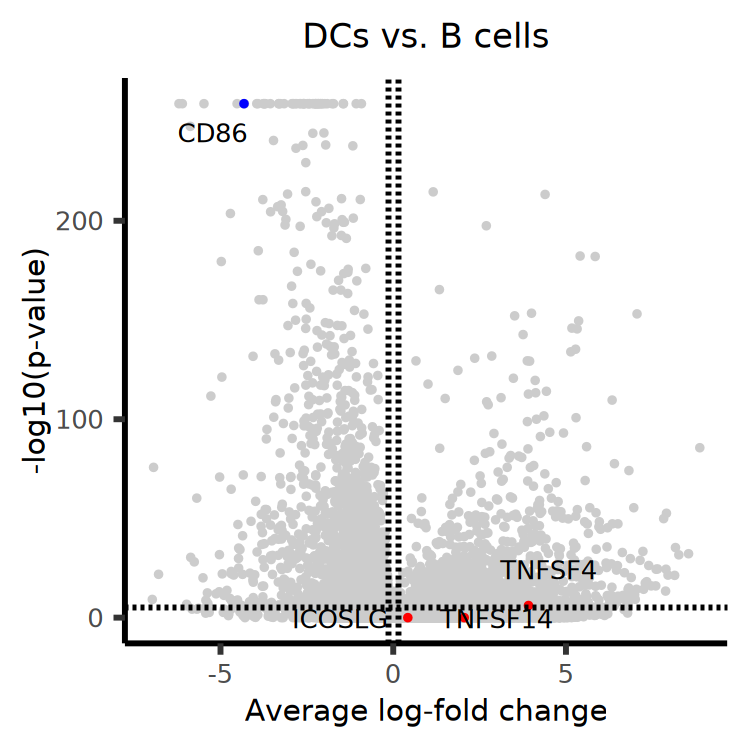

In [41]:
library(ggrepel)
#table(seurat@meta.data$three)
options(repr.plot.width = 2.5, repr.plot.height = 2.5, repr.plot.res = 300, warn = 1)

a = markers.1
head(a, 5)
markers.plot =costim
a$label = rownames(a)
a$label[!rownames(a) %in% markers.plot] = NA
a$avg_log2FC_plot = a$avg_log2FC
#a$avg_log2FC_plot[a$avg_log2FC < -1.5] = -1.5
#a$avg_log2FC_plot[a$avg_log2FC > 1.5] = 1.5

a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-250] = 1e-259

a$color = 'non-sig'
a$color[!is.na(a$label) & a$avg_log2FC > 0] = '2'
a$color[!is.na(a$label) & a$avg_log2FC < 0] = '0'

g7 = ggplot(a %>% arrange(!is.na(label)), aes(x = -avg_log2FC_plot, y = -log10(p_val_plot)), color = color) + geom_point(size = .2, aes(color = color)) +
theme_classic() + #scale_x_continuous(limits = c(-1.5, 1.5)) + 
Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black', max.overlaps = 150) + 
scale_color_manual(values = c( 'red', 'blue','grey80')) + 
geom_hline(yintercept = 5, linetype = 'dashed') + geom_vline(xintercept = .15, linetype = 'dashed') + 
ggtitle('DCs vs. B cells') + theme(plot.title = element_text(hjust = .5)) + 
geom_vline(xintercept = -.15, linetype = 'dashed') #+ scale_y_continuous(limits =c (0, 40))
g7

In [42]:
#seurat@meta.data$pheno = 'Other'
#seurat@meta.data$pheno[seurat@meta.data$myeclust == 'M6'] = 'CD1C+ DC'
#seurat@meta.data$pheno[seurat@meta.data$RNA_snn_res.0.2 == 4] = 'B cell (non-malignant)'
#seurat@meta.data$pheno[seurat@meta.data$RNA_snn_res.0.2 %in% c(5,6)] = 'B cell (likely-malignant)'
#ggplot(seurat@meta.data, aes(x = pheno, y = costim_count)) + geom_violin() + stat_compare_means(comparison = list(c(1,2), c(1,3), c(2,3)))+ labs(y = 'Number of costimulatory receptors')
library(ggpubr)

#df = seurat@meta.data %>% filter(diag %in% c('DIAGNOSIS', 'RELAPSE')) %>% 
#group_by(patient,diag, pheno) %>% summarize(mean = mean(costim_count)) 

#ggplot(df, aes(x = pheno, y = mean)) + geom_point(aes(color =diag)) + stat_compare_means(aes(group = patient), comparison = list(c(1,2), c(1,3), c(2,3)), paired = TRUE) +
#labs(x = c(), y = 'Average number of costim receptors')

In [43]:
options(repr.plot.width = 7, repr.plot.height = 2, repr.plot.res = 300, warn = 1)

#r3 = cowplot::plot_grid(g5, g6, rel_widths = c(3,3), labels = c('E', 'F'), label_size = 9)
#r3

In [44]:
seurat = AddModuleScore(seurat, features = list(genes = costim))

`summarise()` has grouped output by 'patient', 'diag', 'cancer'. You can
override using the `.groups` argument.


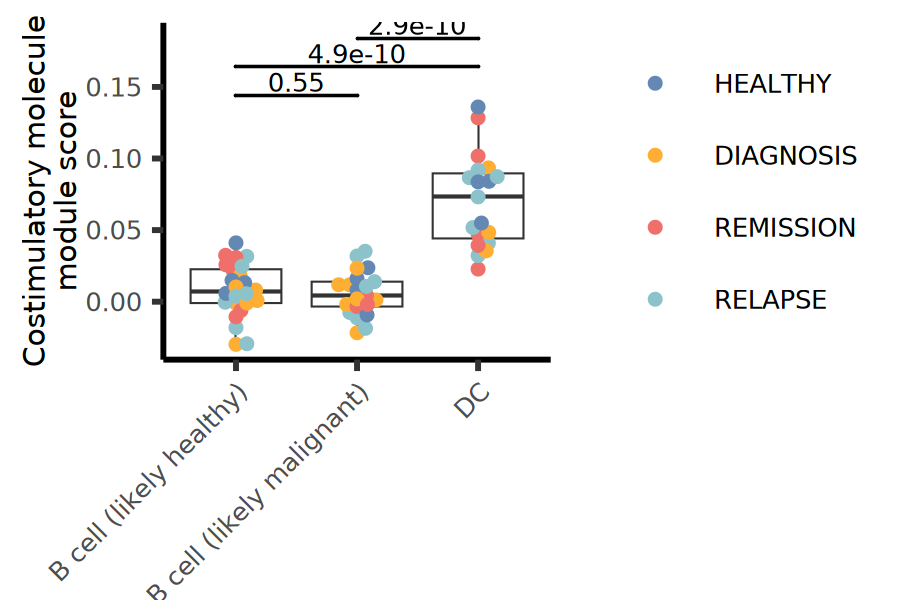

In [56]:
library(ggpubr)
options(repr.plot.width = 3, repr.plot.height = 2)
seurat@meta.data$cancer = ifelse(seurat@meta.data$diag %in% c('DIAGNOSIS', 'RELAPSE'), 'Disease/Relapse', 'Healthy/Remission')
df = seurat@meta.data %>% #filter(diag %in% c('DIAGNOSIS', 'RELAPSE')) %>% 
group_by(patient,diag,cancer, allclust) %>% summarize(mean = mean(Cluster1), n = n()) %>% 
filter(allclust %in% c('B cell (likely healthy)', 'B cell (likely malignant)', 'DC')) %>% mutate(id = paste0(patient, diag)) %>% filter(n > 10)

g9 = ggplot(df, aes(x = allclust, y = mean)) + geom_boxplot(size = .177, outlier.shape = NULL, outlier.size = 0) +  geom_beeswarm(aes(color =diag), cex = 3, size = .8) + 
scale_color_manual(values = tableau_color_pal('Superfishel Stone')(10), limits =c('HEALTHY', 'DIAGNOSIS', 'REMISSION', 'RELAPSE')
) + #geom_line(aes(group = id),size = .177) + 
labs(x = c(), y = 'Costimulatory molecule\nmodule score') + theme_classic() + Axis_themes + labs(color = c()) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
stat_compare_means(aes(group = id), comparison = list(c(1,2), c(1,3), c(2,3)), size = 2.1167, tip.length = 0, paired = FALSE, label = 'p.format') 
g9
ggsave('plot.pdf', height = 2.5, width = 4, useDingbats = FALSE)

In [46]:
#g8 = ggplot()
#options(repr.plot.width = 7, repr.plot.height = 2, repr.plot.res = 300, warn = 1)

#r4 = cowplot::plot_grid(g7, g9, rel_widths = c(3,3), labels = c('G', 'H'), label_size = 9) + ggtitle('DCs vs. B cells')
#r4

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


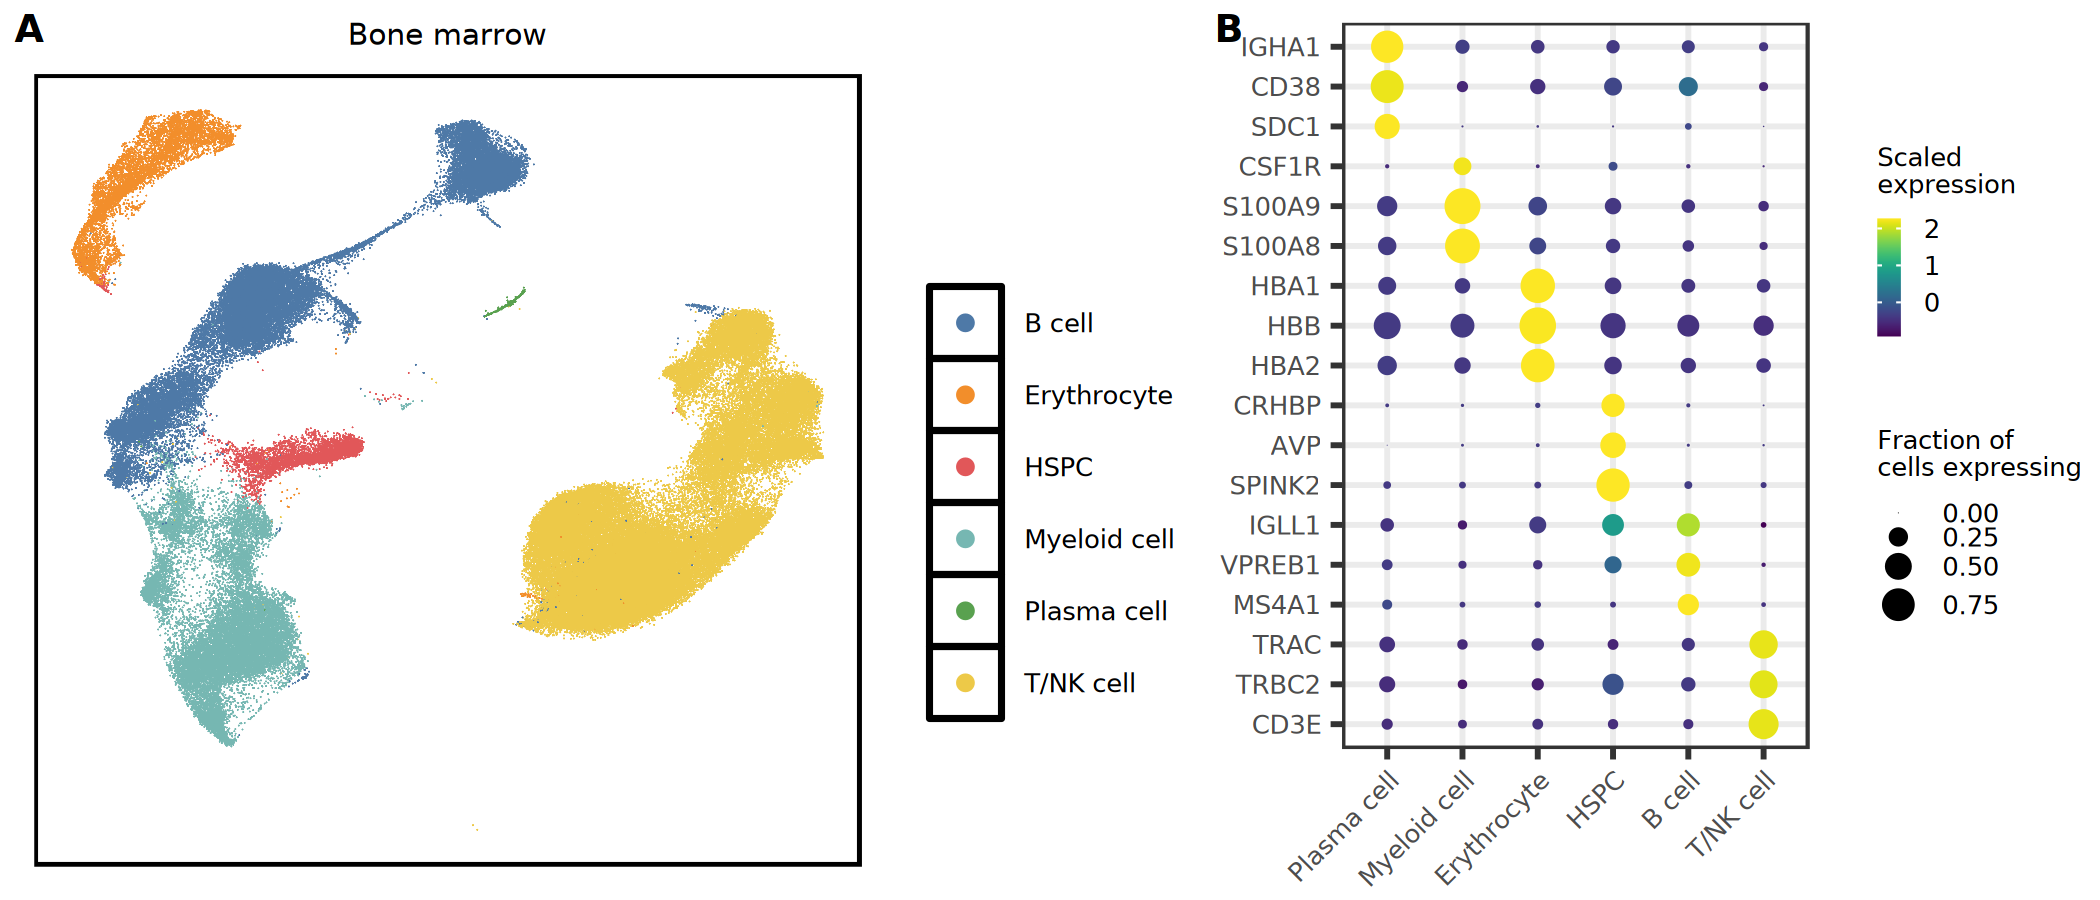

In [47]:
options(repr.plot.width = 7, repr.plot.height = 3)
r1 = cowplot::plot_grid(g1, g2, rel_widths = c(4,3), labels = c('A', 'B'), label_size = 9)
r1

In [48]:
options(repr.plot.width = 7, repr.plot.height = 3)
blank = ggplot() + theme(plot.background = element_rect(fill = NA))
r1 = cowplot::plot_grid(g1, g2, rel_widths = c(3,3), labels = c('A', 'B'), label_size = 9)
r2 = cowplot::plot_grid(g4, g3, rel_widths = c(3.8,3), labels = c('C', 'D'), label_size = 9)
r3 = cowplot::plot_grid(bumap, g5, rel_widths = c(3.8,3), labels = c('E', 'F'), label_size = 9)
r4 = cowplot::plot_grid(g6, g7, blank, rel_widths = c(3, 3, 2), labels = c('G', 'H'), label_size = 9, ncol = 3) #+ ggtitle('DCs vs. B cells'3)

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12985 rows containing missing values or values outside the scale range
(`geom_text_repel()`).”


Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


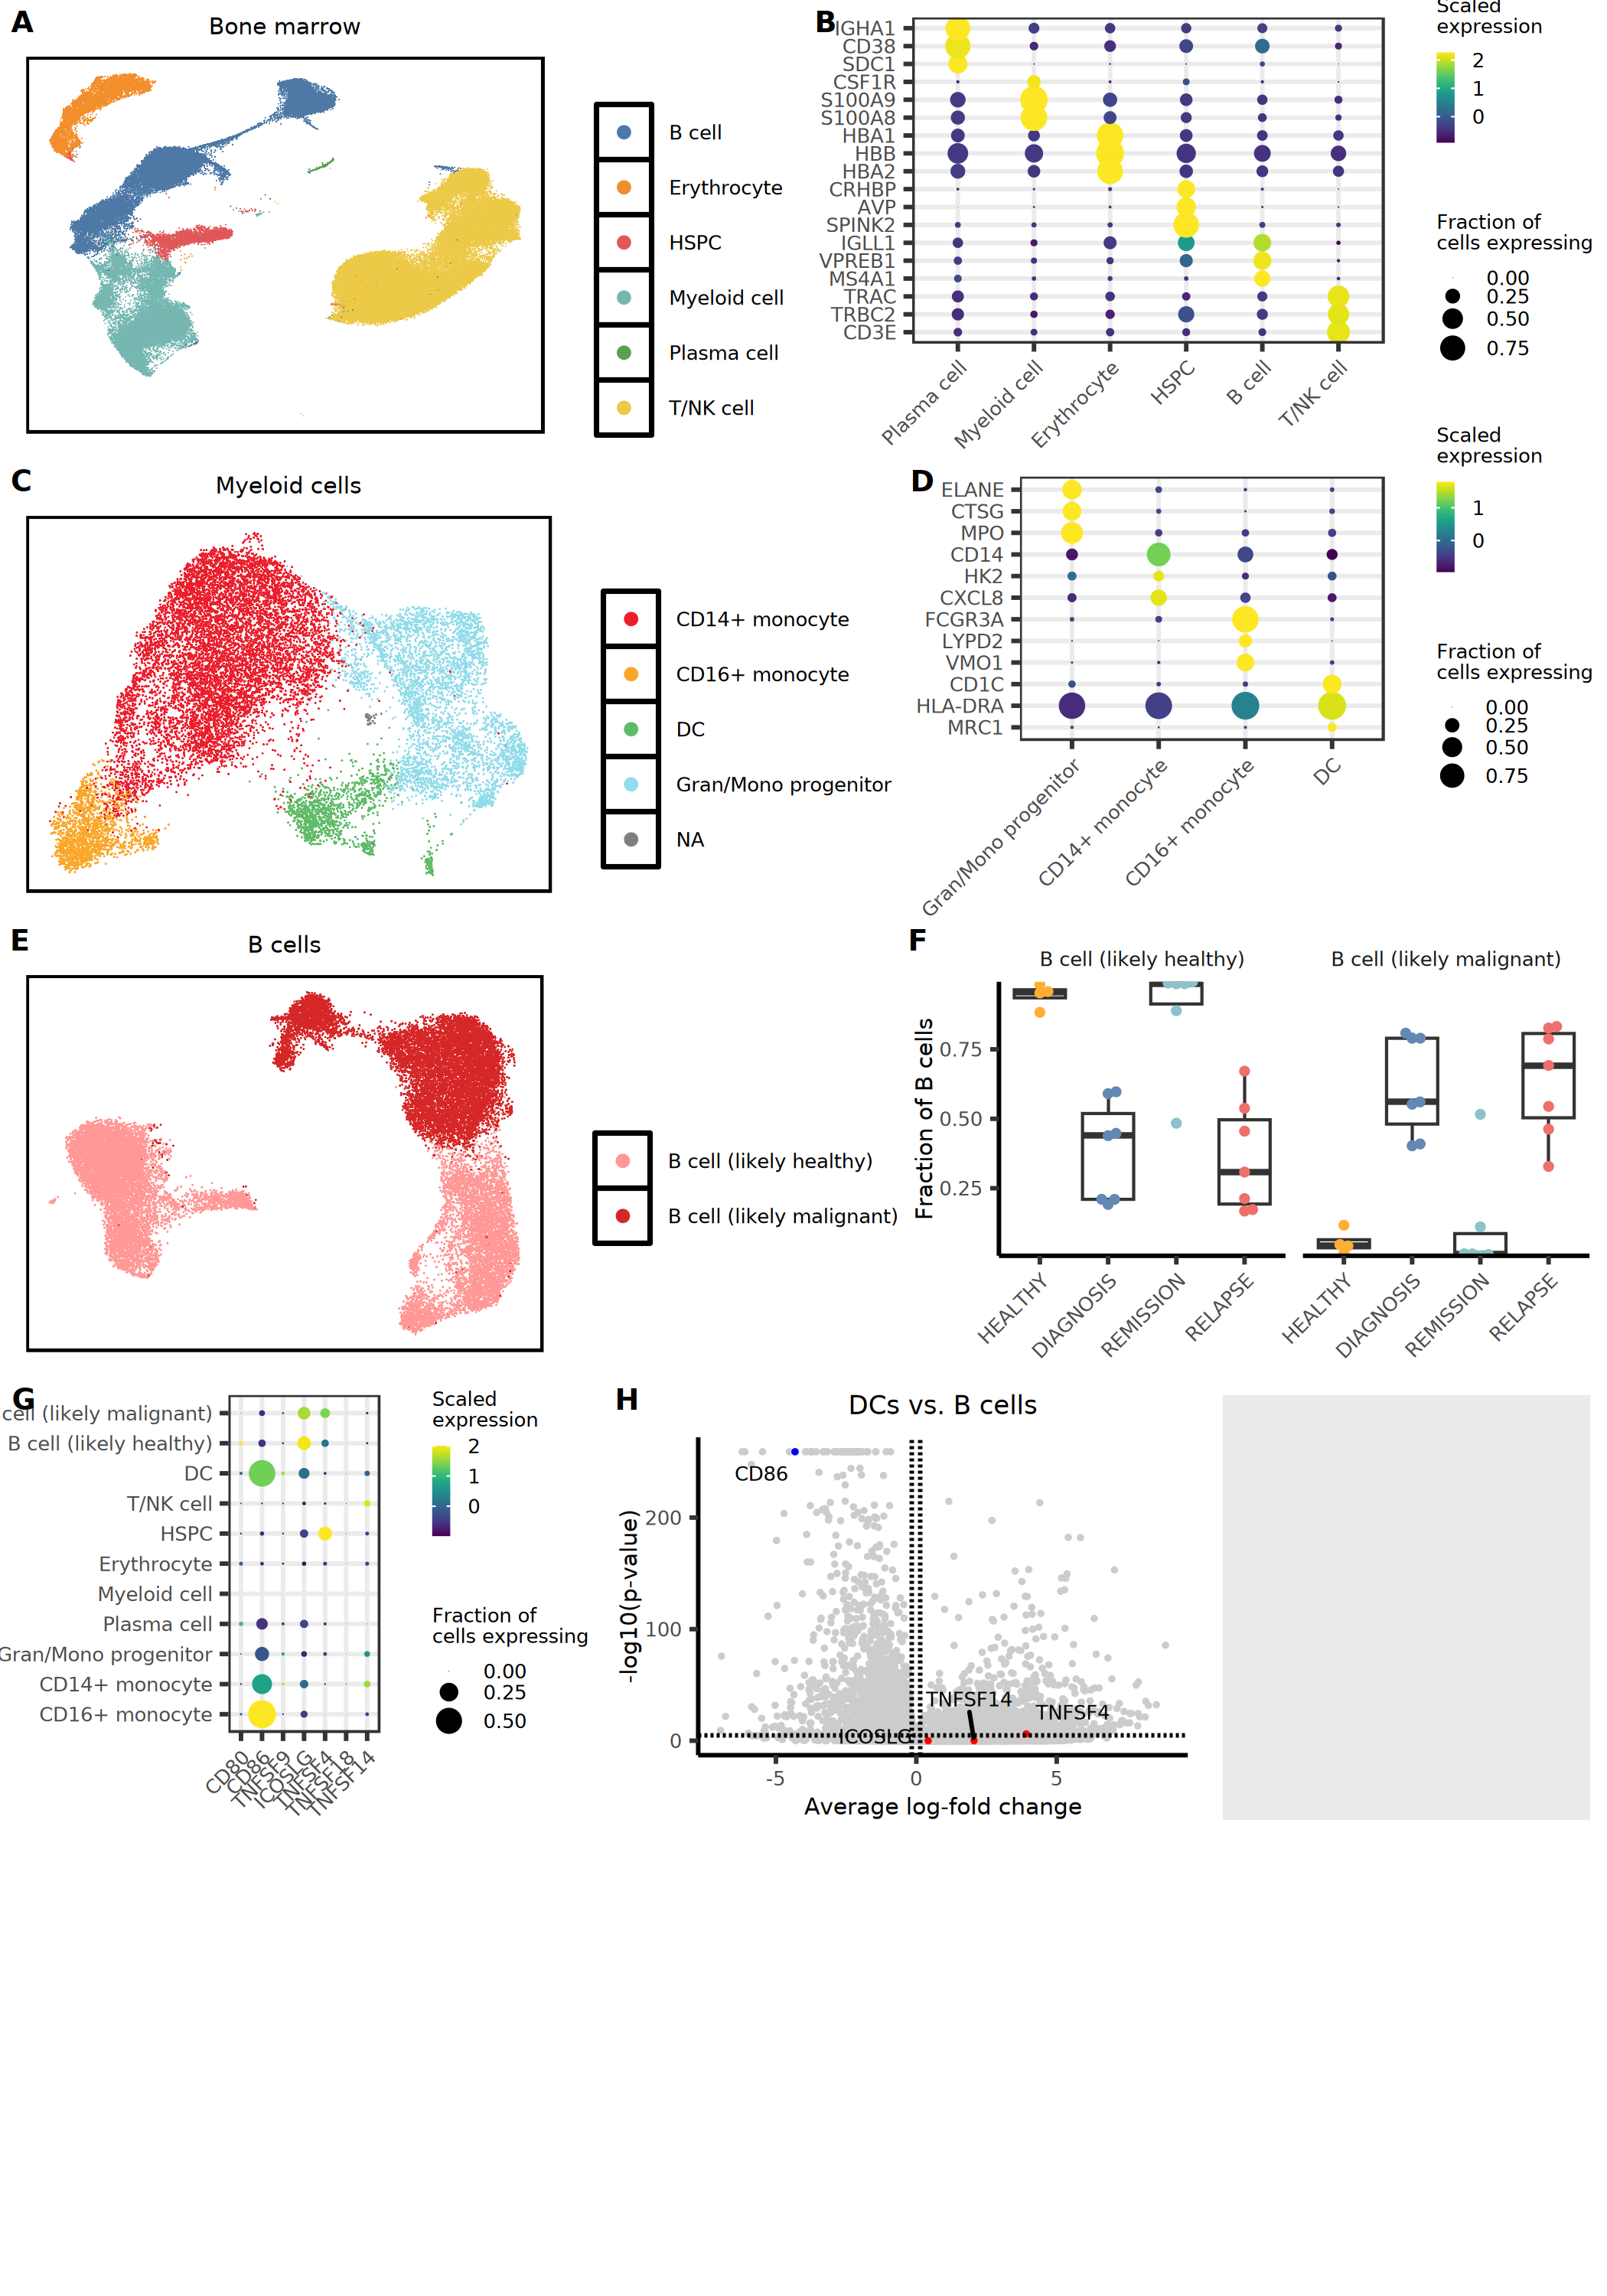

In [49]:
options(repr.plot.width = 7, repr.plot.height = 10, repr.plot.res = 300, warn = 1)

cowplot::plot_grid(r1, r2, r3,r4,  c(3,3,3,2), ncol = 1)
ggsave('figures.pdf', height = 10, width = 7, useDingbats = FALSE)

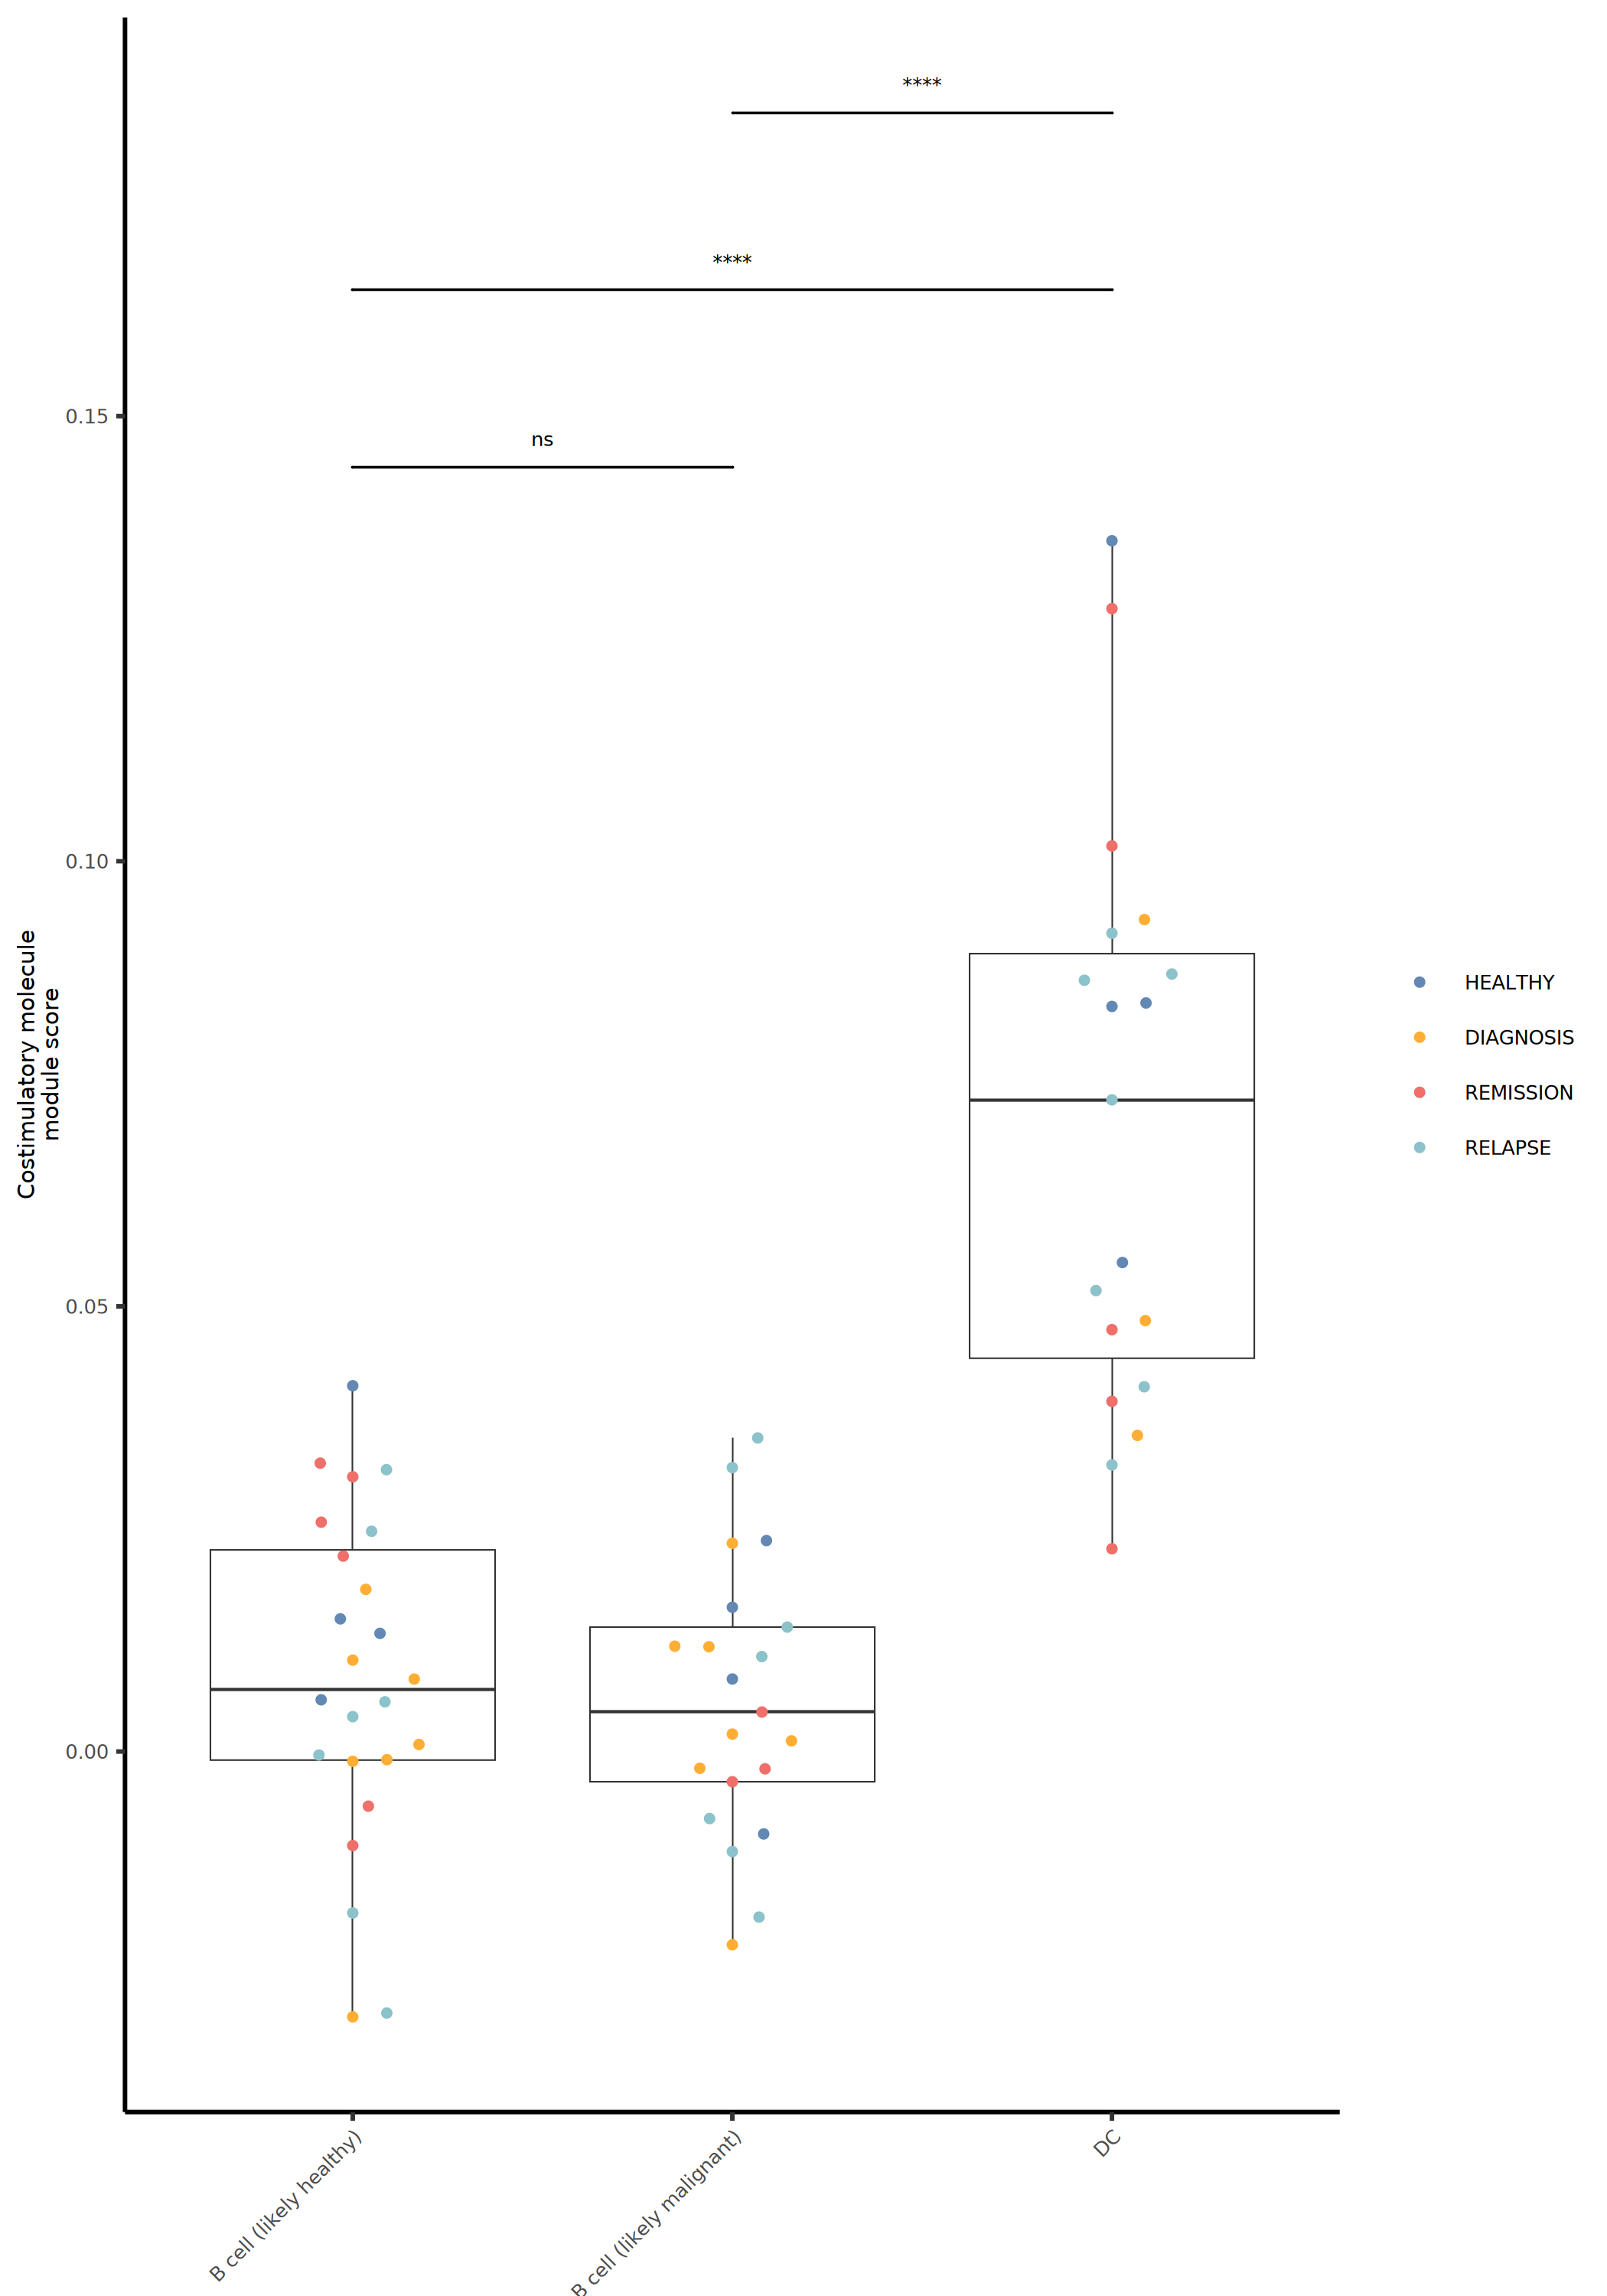

In [50]:
g9
ggsave('plot.pdf', height = 2.5, width = 3, useDingbats = FALSE)

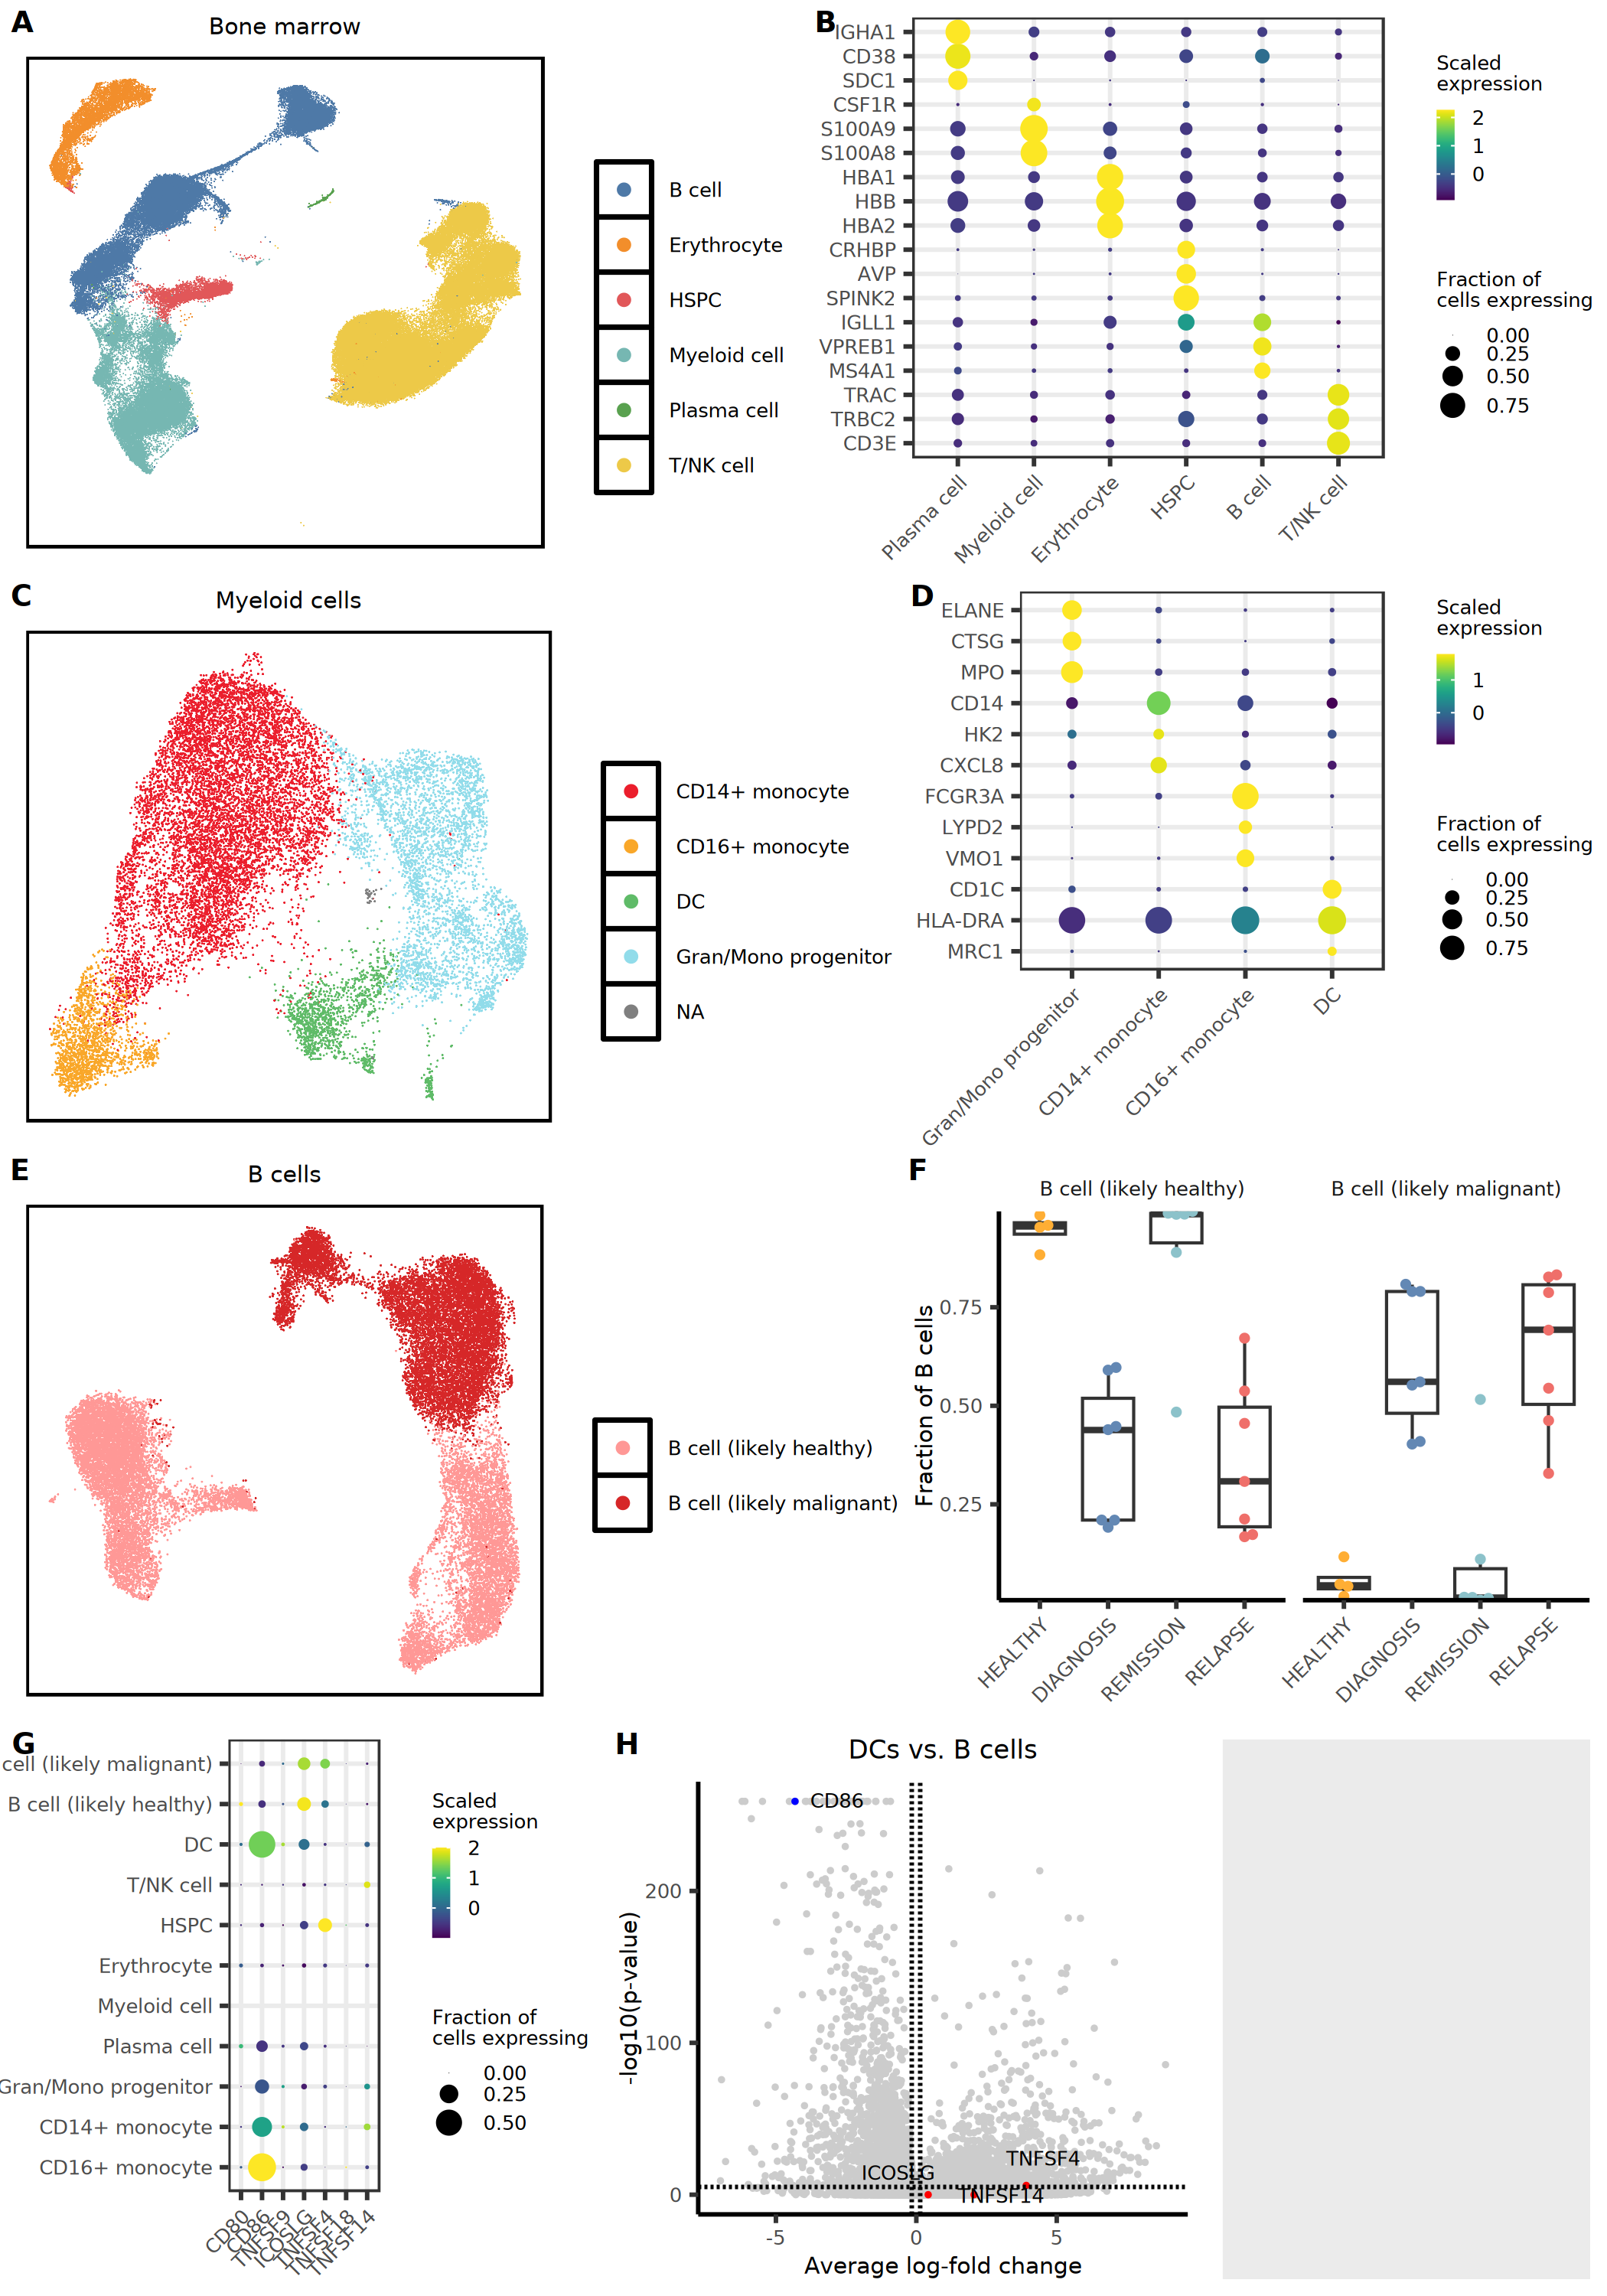

In [51]:
options(repr.plot.width = 7, repr.plot.height = 10, repr.plot.res = 300, warn = 1)

cowplot::plot_grid(r1, r2, r3, r4, rel_widths = c(3,3,2,2), ncol = 1)
ggsave('figures.pdf', height = 10, width = 7, useDingbats = FALSE)

`summarise()` has grouped output by 'patient', 'diag'. You can override using
the `.groups` argument.
Warning message:
“Computation failed in `stat_signif()`.
Caused by error in `wilcox.test.default()`:
! not enough 'y' observations”


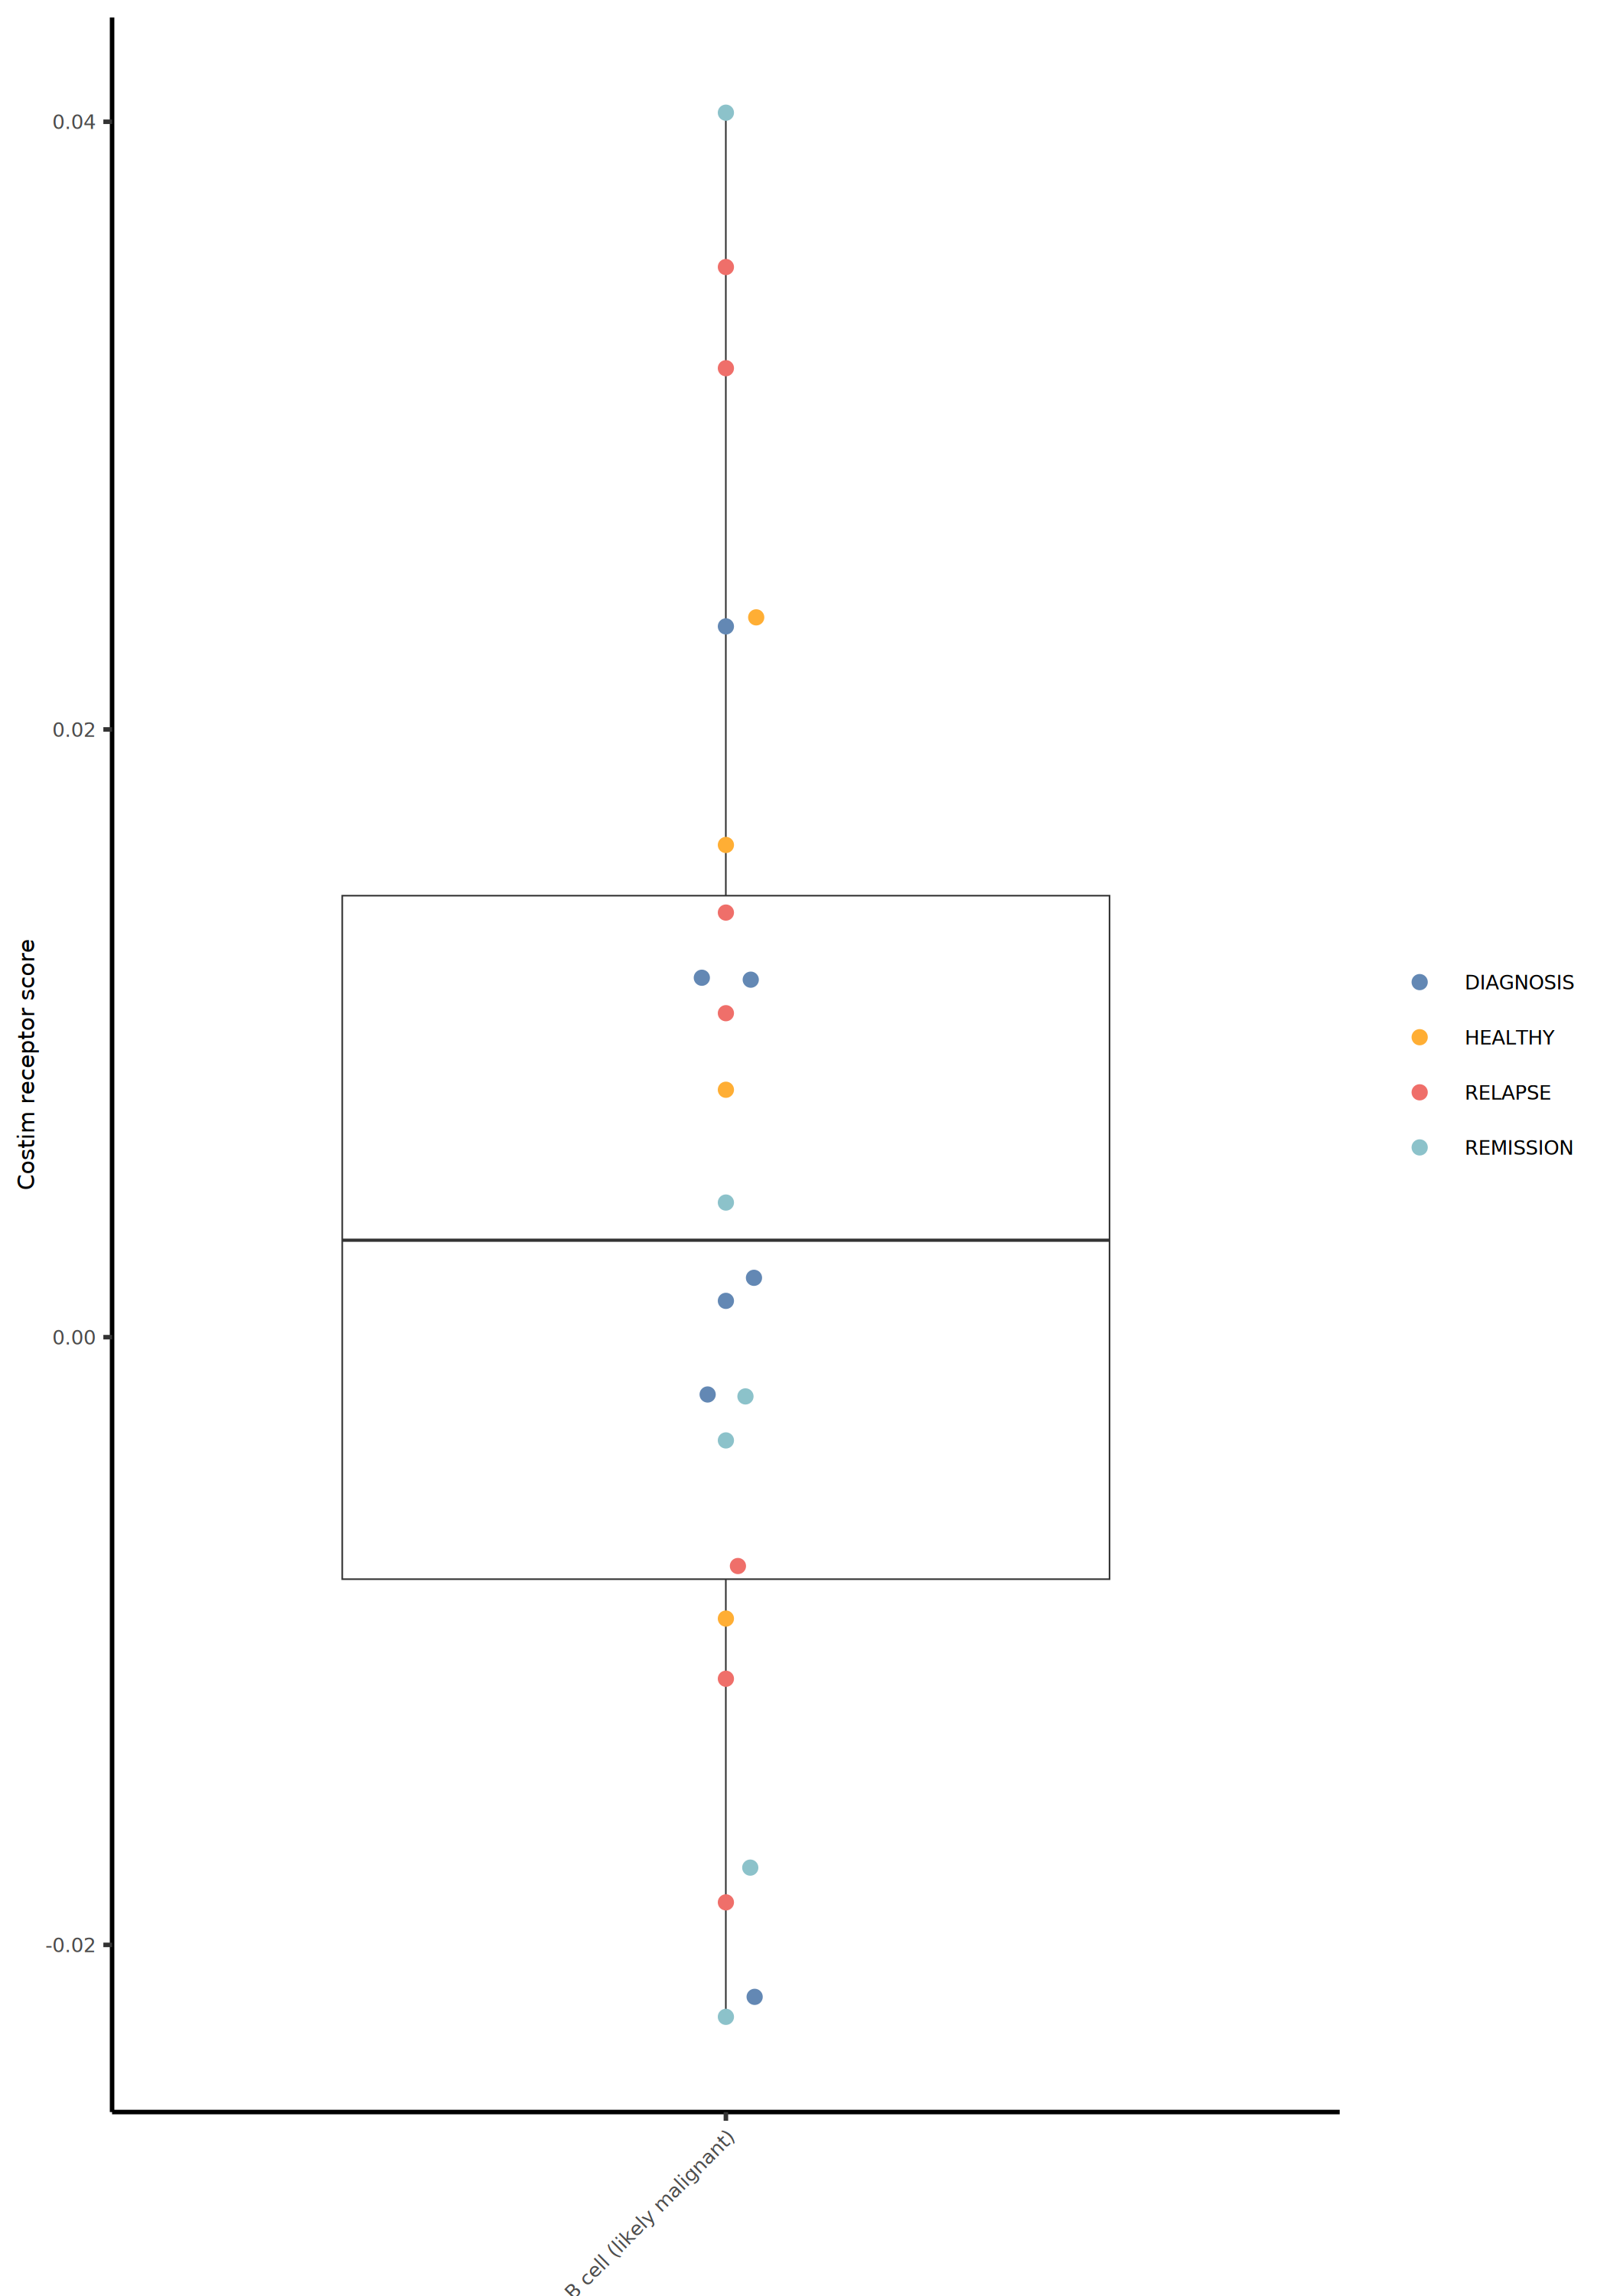

In [52]:

df = seurat@meta.data %>% #filter(diag %in% c('DIAGNOSIS', 'RELAPSE')) %>% 
group_by(patient,diag, allclust) %>% summarize(mean = mean(Cluster1)) %>% 
filter(allclust %in% c('B cell (likely malignant)', 'B cell (untransformed)', 'CD1C+ DC', 'XCR1+ DC'))

g9 = ggplot(df, aes(x = allclust, y = mean)) + geom_boxplot(size = .177) +  geom_beeswarm(aes(color =diag), cex = 3) + 
stat_compare_means(size = 2.1167, aes(group = patient), comparison = list(c(1,3),c(2,3))) +
scale_color_manual(values = tableau_color_pal('Superfishel Stone')(10)) + 
labs(x = c(), y = 'Costim receptor score') + theme_classic() + Axis_themes + labs(color = c()) + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))
g9

In [53]:
costim

[1] "CD80"    "CD86"    "TNFSF9"  "ICOSLG"  "TNFSF4"  "TNFSF18" "TNFSF14"